In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.preprocessing as skp
import matplotlib.pyplot as plt
import partial_corr
import corr_significance

In [3]:
#roads = pd.read_csv('fulldata.csv')
#roads.head()

Взгляд на данные

In [4]:
#roads.describe()

In [5]:
#np.random.seed(42)
#sample = roads.sample(1000)

In [6]:
sample = pd.read_csv("sample.csv")

In [7]:
sample.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'lat_', 'lon_', 'State_', 'Ta_mean',
       'Ta_min', 'Ta_max', 'Tsurf_mean', 'Tsurf_min', 'Tsurf_max',
       'Water_mean', 'Water_min', 'Water_max', 'Speed_mean', 'Speed_min',
       'Speed_max', 'Height_mean', 'Height_min', 'Height_max', 'Tdew_mean',
       'Tdew_min', 'Tdew_max', 'Friction_mean', 'Friction_min', 'Friction_max',
       'Date', 'Time', 'Direction_min', 'Direction_max', 'FullDate',
       'ClosestCity', 'date_time', 'maxtempC', 'mintempC', 'totalSnow_cm',
       'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'location'],
      dtype='object')

lat_ — широта
 lon_ — долгота
State_ — характеризация дороги (1: 'dry', 2: 'moist', 3: 'wet', 4: 'icy', 5: 'snowy', 6: 'slushy')
Ta_mean,Ta_min,Ta_max — температура атмосферы
Tsurf_mean,Tsurf_min,Tsurf_max — температура поверхности
Water_mean,Water_min,Water_max — толщина водного слоя на дороге (0 - 3 мм)
Speed_mean,Speed_min,Speed_max — скорость ветра (в узлах, 5 узлов = 9.3 км/ч)
Height_mean,Height_min,Height_max — высота над уровнем моря
Tdew_mean,Tdew_min,Tdew_max — точка росы (Цельсии)
Friction_mean,Friction_min,Friction_max — величина скольжения (от 0 до 1)
Date,Time, date_time, FullDate — время и дата
Direction_min,Direction_max — направления ветра (в градусах, описывают сектор, в котором дул ветер)
ClosestCity, location — ближайший город
maxtempC,mintempC — максимальная и минимальная температура воздуха в течении дня (Цельсии)
totalSnow_cm — суммарная толщина выпавшего снега за сутки (в см)
sunHour — солнечная энергия в Солнце-часах (A “Sun-Hour” is “1000 watts of energy shining on 1 square meter of surface for 1 hour”)
uvIndex — индекс ультрафиолета
moon_illumination — фаза Луны (в процентах)
moonrise — время восхода Луны
moonset — время захода Луны
sunrise — время восхода Солнца
sunset — время захода Солнца
DewPointC — ещё один признак с точкой росы, измеренный от часа к часу (Цельсии)
FeelsLikeC — температура воздуха по ощущениям (Цельсии)
HeatIndexC — индекс тепла (Цельсии)
WindChillC — ветро-холодовой индекс
WindGustKmph — мера порывов ветра
cloudcover — мера облачности (в процентах)
humidity — влажность (в процентах)
precipMM — атмосферные осадки (в мм)
pressure — атмосферное давление (в мбар)
tempC — температура воздуха
visibility — видимость
winddirDegree — направление ветра (в градусах)
windspeedKmph — скорость ветра (в км/ч)

In [8]:
sample1 = sample[['State_', 'Ta_mean', 'Tsurf_mean', 'Water_mean', 'Speed_mean', 'Height_mean', 'Friction_mean', 'mintempC', 'DewPointC', 'humidity', 'pressure']]

In [9]:
sample.head()

Unnamed: 0.1  Unnamed: 0     lat_     lon_  State_    Ta_mean  Ta_min  \
0         93084       93084  68.4317  17.4334       5  12.400000    12.4   
1         70925       70925  68.4349  17.4320       3   4.711765     4.7   
2         47174       47174  68.4117  17.4310       6   5.400000     5.4   
3        163824      163824  68.5296  17.4650       1  12.600000    12.6   
4         67379       67379  68.4436  17.4176       4  15.133333    10.6   

   Ta_max  Tsurf_mean  Tsurf_min  ...  WindGustKmph  cloudcover  humidity  \
0    12.4    1.810000       1.75  ...            15          63        79   
1     4.9    0.167647      -0.15  ...            41          93        89   
2     5.4   -2.320000      -2.32  ...            48         100        94   
3    12.6    3.230000       3.23  ...            28           5        76   
4    16.1    2.903333       1.28  ...            28          68        78   

   precipMM  pressure  tempC  visibility  winddirDegree  windspeedKmph  \
0       0.0      1030     -3          10            182              9   
1       0.6      1002     -4           6            257             21   
2       1.2      1020     -5           1            273             26   
3       0.0      1013     -7          10            105             13   
4       0.0      1004     -5          10            109             18   

   location  
0    narvik  
1    narvik  
2    narvik  
3    oyjord  
4    narvik  

[5 rows x 57 columns]

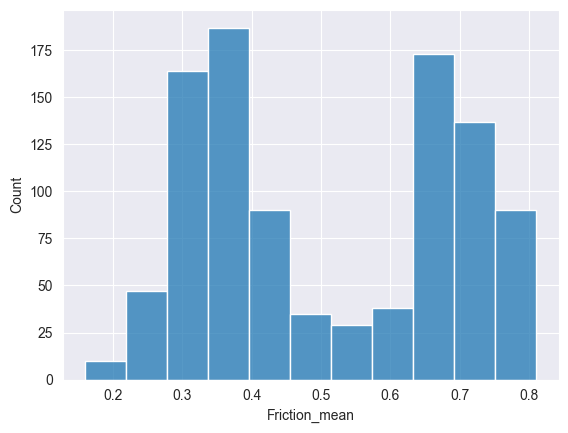

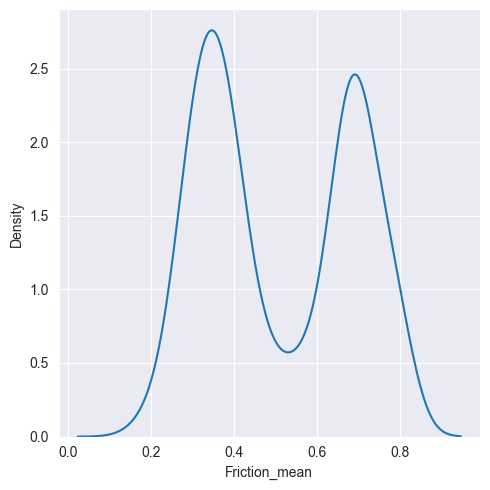

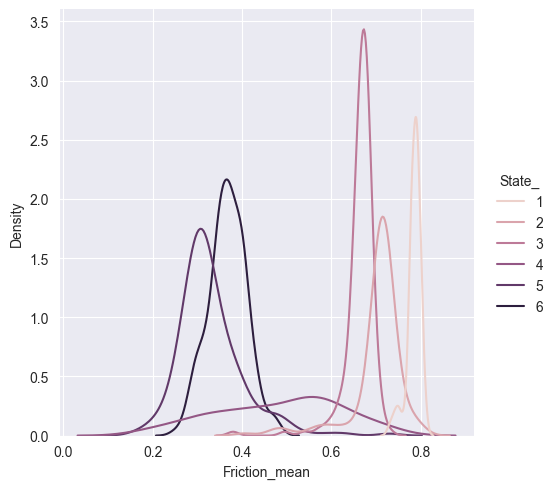

In [10]:
sns.histplot(x = "Friction_mean", data = sample1)
sns.displot(x = "Friction_mean", data = sample1, kind = "kde")
sns.displot(x = "Friction_mean", data = sample1, kind = "kde", hue = "State_")

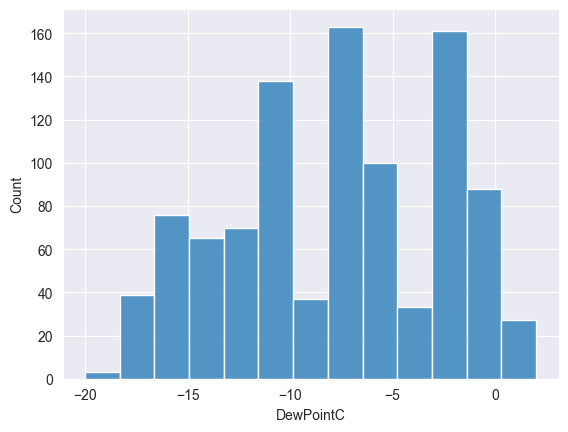

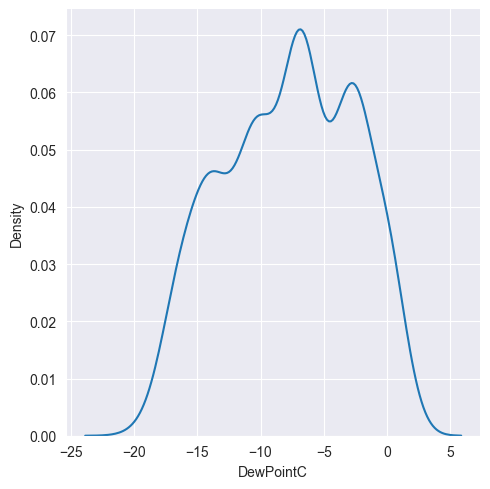

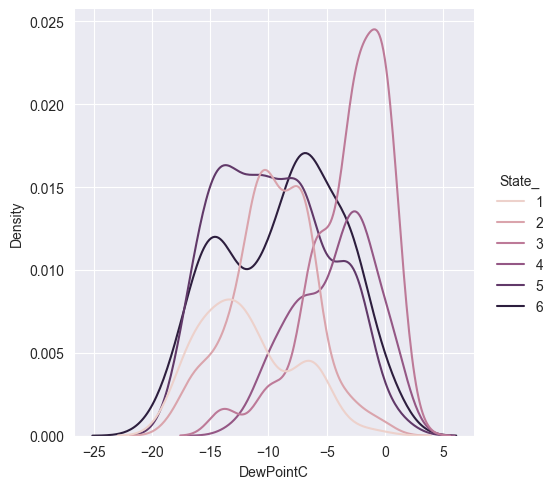

In [11]:
sns.histplot(x = "DewPointC", data = sample1)
sns.displot(x = "DewPointC", data = sample1, kind = "kde")
sns.displot(x = "DewPointC", data = sample1, kind = "kde", hue = "State_")

visibility       0      1      2      3      4      5      6      7      8   \
Unnamed: 0.1  0.003  0.004  0.089  0.036  0.053  0.014  0.034  0.027  0.024   

visibility       9     10  
Unnamed: 0.1  0.026  0.69

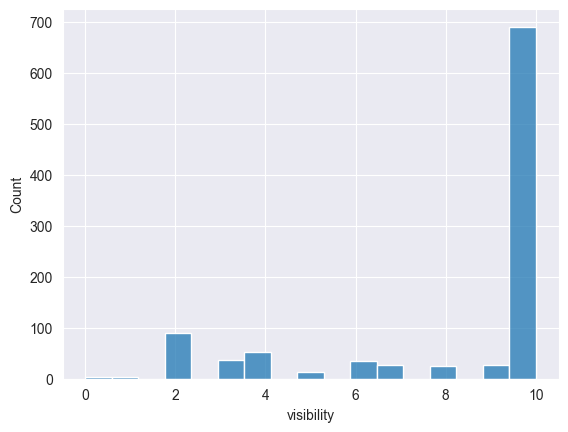

In [12]:
sns.histplot(x = "visibility", data = sample)
pd.DataFrame(sample.groupby(by = 'visibility').count().iloc[:,0]/1000).transpose()

In [13]:
from statsmodels.nonparametric import kernel_regression

In [14]:
def conditional_exp_var(data, regressor, target):
    nwe = kernel_regression.KernelReg(endog=data[target], exog  = data[regressor], var_type='c')
    nwe_variance = kernel_regression.KernelReg(endog=(data[target] - nwe.fit()[0])**2, exog  = data[regressor], var_type='c')
    x = np.linspace(start=data[regressor].min(), stop = data[regressor].max(), num=1000)

    plt.subplots(nrows=2, ncols=1, tight_layout = True)
    plt.subplot(2, 1, 1)
    sns.scatterplot(data = data, x = regressor, y = target, hue = 'State_')
    sns.lineplot(x = x, y = nwe.fit(x)[0])

    plt.subplot(2, 1 ,2)
    sns.lineplot(x = x, y = nwe_variance.fit(x)[0])
    plt.xlabel(regressor)
    plt.ylabel('$\mathbf{D}$('+target+' | ' +regressor + ')')

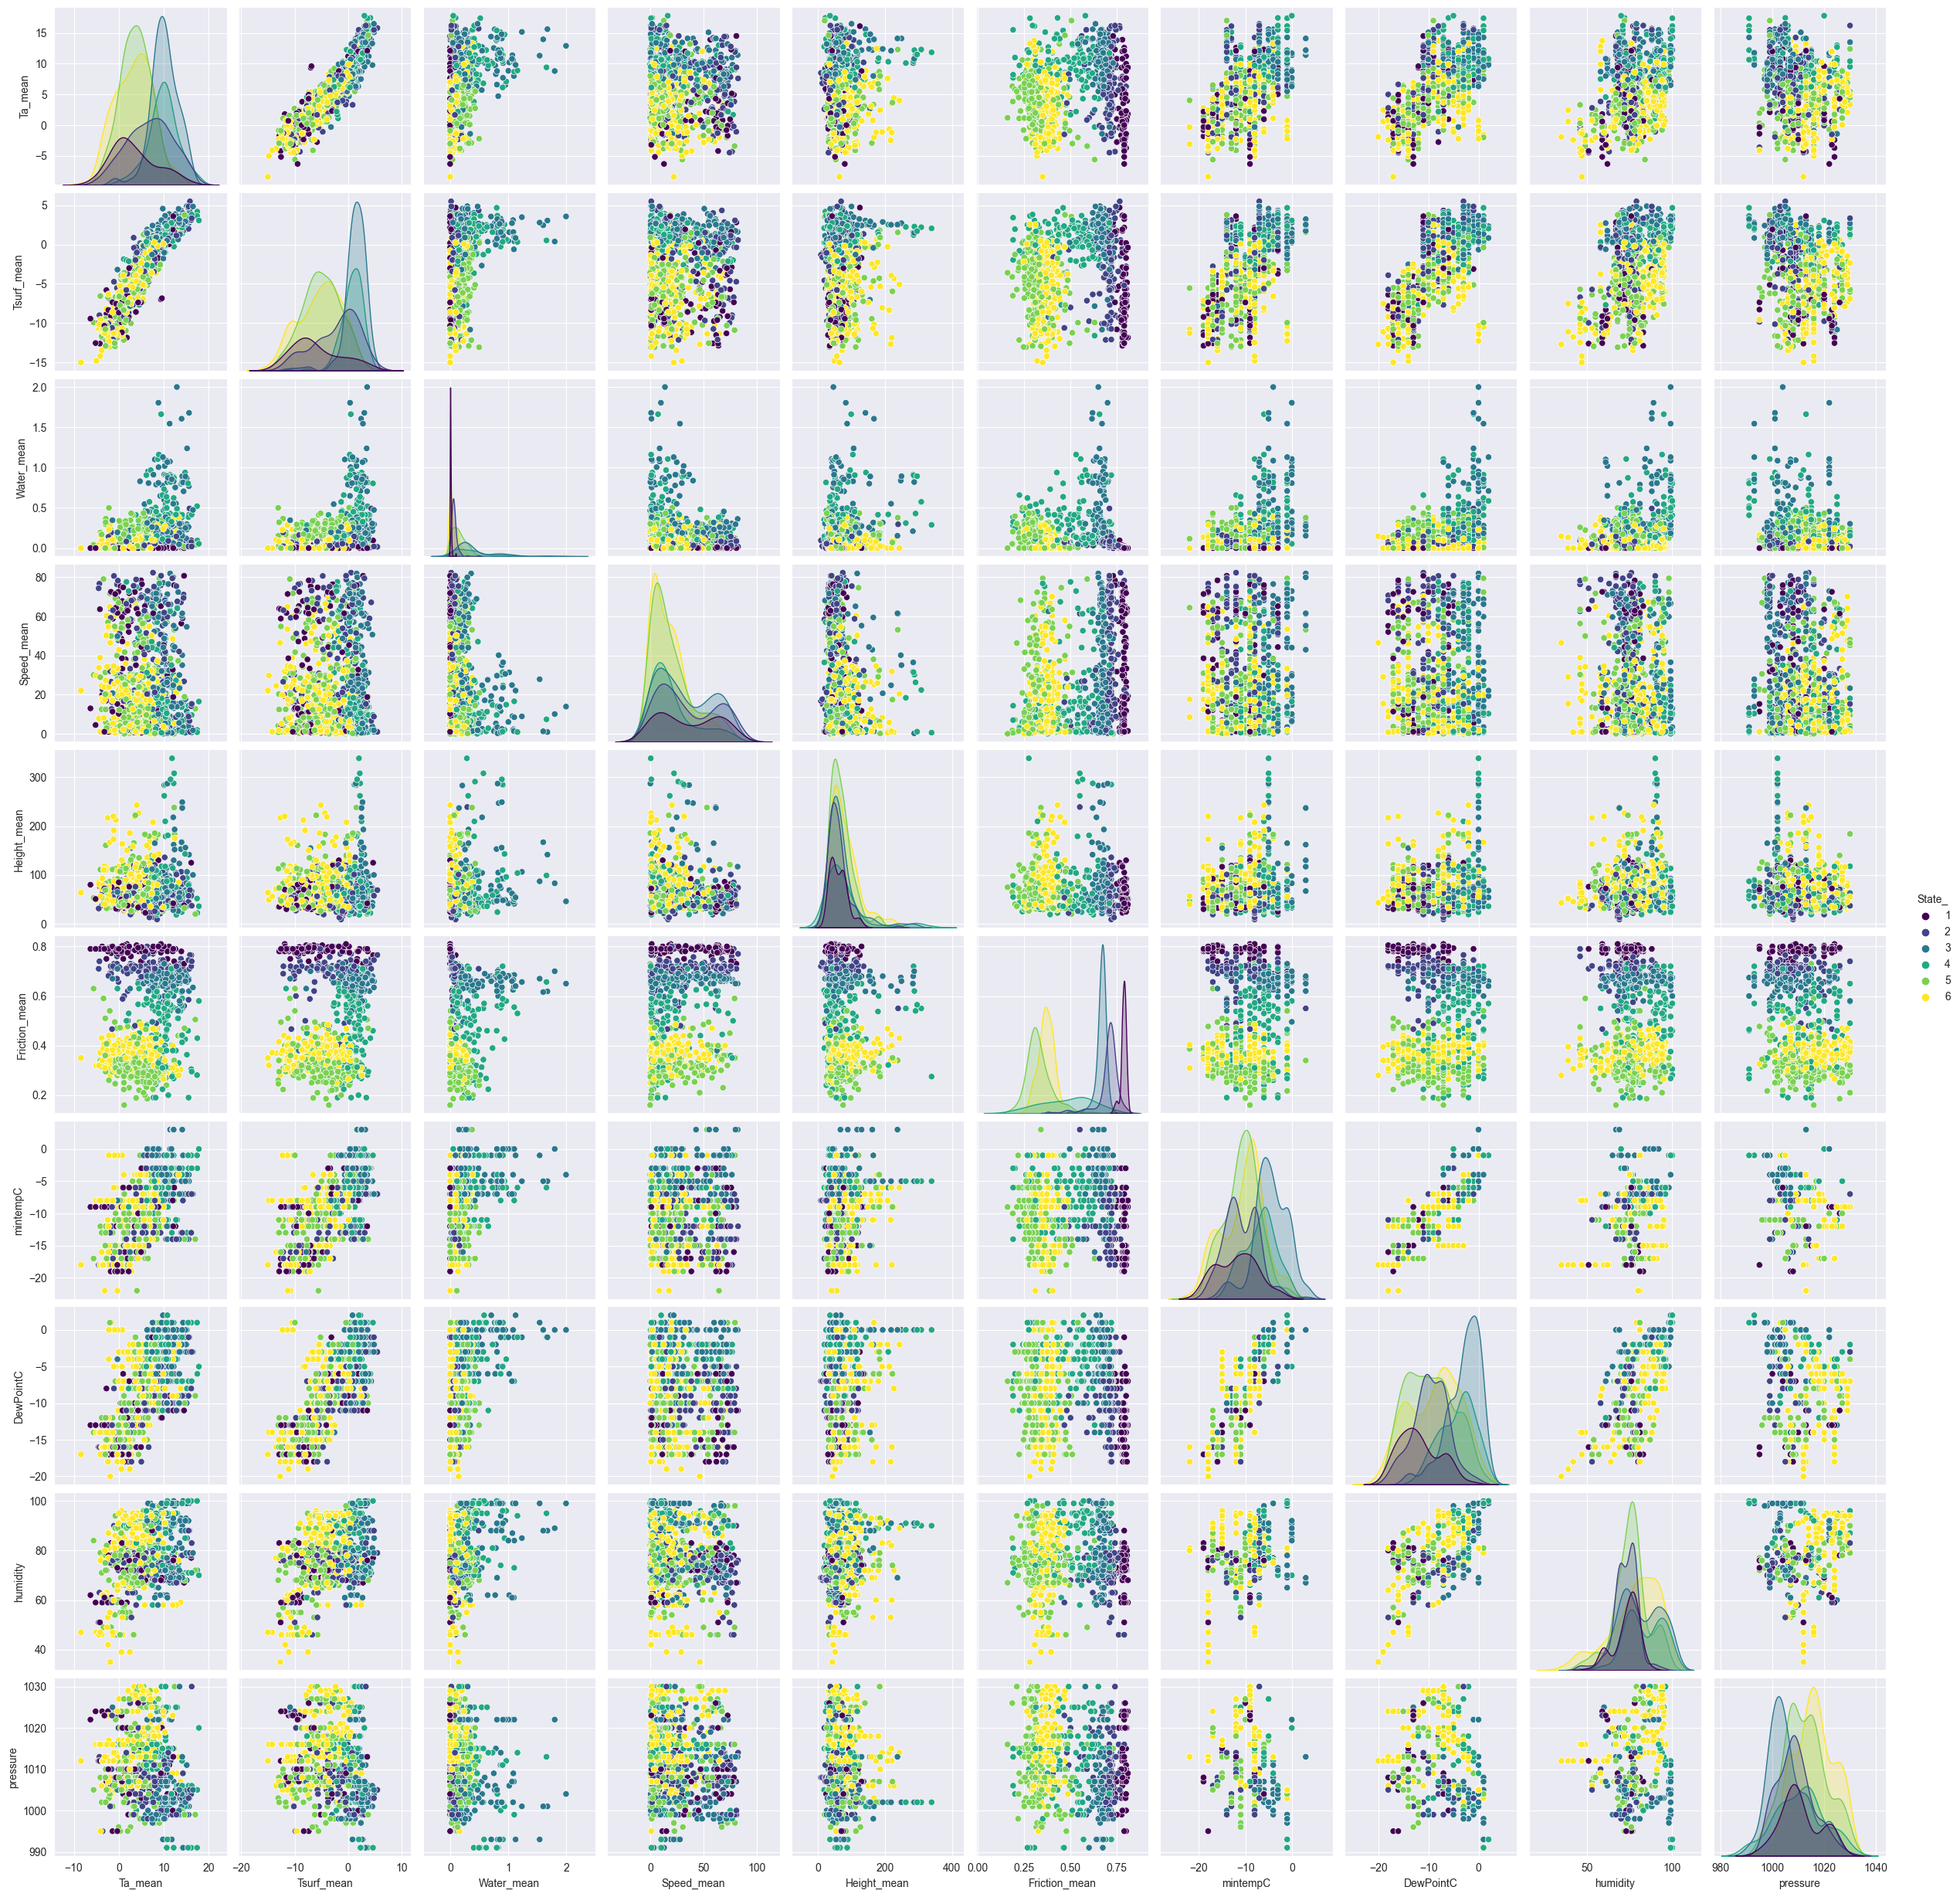

In [15]:
sns.pairplot(data = sample1, hue='State_', palette='viridis')
sns.set(font_scale=1.1)

Методом пристального взгляда в признаке Friction можно разглядеть мультимодальность, разбиваемую по State: State < 3, State = 4, State > 4

Предсказывать будем $Friction$ (как показатель риска аварий) по набору признаков, который получим из представленных признаков после анализа корреляций.

In [16]:
sample = sample[['State_', 'Friction_mean', 'Ta_mean', 'Tsurf_mean',
       'Water_mean', 'Speed_mean', 'Height_mean','maxtempC', 'mintempC', 'totalSnow_cm',
       'sunHour', 'uvIndex', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'windspeedKmph']]

In [17]:
samplel4, sample4, sampleb4 = sample[sample['State_'] < 4], sample[sample['State_'] == 4], sample[sample['State_'] > 4]

In [18]:
samplel4.describe()

State_  Friction_mean     Ta_mean  Tsurf_mean  Water_mean  \
count  413.000000     413.000000  413.000000  413.000000  413.000000   
mean     2.232446       0.702652    7.521634   -1.397904    0.210166   
std      0.772220       0.062209    4.919456    4.483932    0.300220   
min      1.000000       0.380000   -6.300000  -12.900000    0.000000   
25%      2.000000       0.670000    4.000000   -4.602000    0.027000   
50%      2.000000       0.700000    8.500000    0.300000    0.092500   
75%      3.000000       0.735556   10.800000    1.940476    0.264000   
max      3.000000       0.810000   16.482143    5.492857    1.998750   

       Speed_mean  Height_mean    maxtempC    mintempC  totalSnow_cm  ...  \
count  413.000000   413.000000  413.000000  413.000000    413.000000  ...   
mean    33.798909    64.505240   -2.789346   -8.312349      1.668523  ...   
std     26.127387    38.597830    4.500990    5.035483      5.301449  ...   
min      0.220000     9.000000  -14.000000  -19.000000      0.000000  ...   
25%     10.109091    41.000000   -6.000000  -12.000000      0.000000  ...   
50%     27.400000    55.120000   -2.000000   -8.000000      0.000000  ...   
75%     60.350000    73.090909    1.000000   -5.000000      0.000000  ...   
max     82.400000   287.000000    6.000000    3.000000     25.400000  ...   

       HeatIndexC  WindChillC  WindGustKmph  cloudcover    humidity  \
count  413.000000  413.000000     413.00000  413.000000  413.000000   
mean    -3.549637   -8.268765      21.96368   60.382567   76.496368   
std      4.774079    6.267726       8.27302   31.835040   10.371877   
min    -15.000000  -25.000000       4.00000    3.000000   46.000000   
25%     -7.000000  -12.000000      16.00000   35.000000   70.000000   
50%     -2.000000   -7.000000      21.00000   62.000000   76.000000   
75%      1.000000   -3.000000      28.00000   91.000000   81.000000   
max      6.000000    3.000000      51.00000  100.000000  100.000000   

         precipMM     pressure       tempC  visibility  windspeedKmph  
count  413.000000   413.000000  413.000000  413.000000     413.000000  
mean     0.144794  1008.067797   -3.569007    8.777240      13.368039  
std      0.390610     7.674839    4.764677    2.473896       4.651458  
min      0.000000   991.000000  -15.000000    1.000000       3.000000  
25%      0.000000  1002.000000   -7.000000   10.000000      11.000000  
50%      0.000000  1007.000000   -2.000000   10.000000      13.000000  
75%      0.000000  1013.000000    1.000000   10.000000      15.000000  
max      2.800000  1030.000000    6.000000   10.000000      26.000000  

[8 rows x 24 columns]

In [19]:
samplel4.mean()

State_              2.232446
Friction_mean       0.702652
Ta_mean             7.521634
Tsurf_mean         -1.397904
Water_mean          0.210166
Speed_mean         33.798909
Height_mean        64.505240
maxtempC           -2.789346
mintempC           -8.312349
totalSnow_cm        1.668523
sunHour             0.955206
uvIndex             1.501211
DewPointC          -7.169492
FeelsLikeC         -8.268765
HeatIndexC         -3.549637
WindChillC         -8.268765
WindGustKmph       21.963680
cloudcover         60.382567
humidity           76.496368
precipMM            0.144794
pressure         1008.067797
tempC              -3.569007
visibility          8.777240
windspeedKmph      13.368039
dtype: float64

In [20]:
sample4.mean()

State_              4.000000
Friction_mean       0.482216
Ta_mean             9.825337
Tsurf_mean          0.688048
Water_mean          0.350411
Speed_mean         20.516655
Height_mean        77.548697
maxtempC           -0.883333
mintempC           -6.925000
totalSnow_cm        4.387500
sunHour             1.074167
uvIndex             1.291667
DewPointC          -4.275000
FeelsLikeC         -5.625000
HeatIndexC         -1.833333
WindChillC         -5.625000
WindGustKmph       18.333333
cloudcover         68.475000
humidity           83.775000
precipMM            0.371667
pressure         1010.641667
tempC              -1.866667
visibility          7.175000
windspeedKmph      11.533333
dtype: float64

In [21]:
sampleb4.mean()

State_              5.496788
Friction_mean       0.348648
Ta_mean             3.627040
Tsurf_mean         -5.102501
Water_mean          0.107762
Speed_mean         19.256158
Height_mean        75.472420
maxtempC           -4.460385
mintempC          -10.584582
totalSnow_cm        3.231263
sunHour             2.356745
uvIndex             1.486081
DewPointC          -9.207709
FeelsLikeC        -10.229122
HeatIndexC         -5.665953
WindChillC        -10.229122
WindGustKmph       19.691649
cloudcover         56.147752
humidity           76.884368
precipMM            0.101927
pressure         1014.366167
tempC              -5.704497
visibility          8.147752
windspeedKmph      11.805139
dtype: float64

In [22]:
samplel4.cov()

State_  Friction_mean    Ta_mean  Tsurf_mean  Water_mean  \
State_          0.596323      -0.034264   1.976987    2.138394    0.134911   
Friction_mean  -0.034264       0.003870  -0.108789   -0.112036   -0.007496   
Ta_mean         1.976987      -0.108789  24.201044   20.158774    0.549371   
Tsurf_mean      2.138394      -0.112036  20.158774   20.105644    0.542527   
Water_mean      0.134911      -0.007496   0.549371    0.542527    0.090132   
Speed_mean     -1.038841       0.221632 -16.836582   -9.846824   -1.783341   
Height_mean     3.937190      -0.212637  27.535080   20.874188    2.868386   
maxtempC        2.426644      -0.127278  14.117321   15.400633    0.690475   
mintempC        2.356761      -0.121288  10.955119   12.691385    0.720698   
totalSnow_cm    1.183791      -0.054583   3.849273    5.370318    0.444917   
sunHour        -0.091747       0.006164  -3.169488   -2.852829    0.024735   
uvIndex        -0.150768       0.006456  -0.762710   -0.743652   -0.050905   
DewPointC       2.813765      -0.142633  16.904634   17.972853    0.891042   
FeelsLikeC      3.125732      -0.168053  17.275755   18.837830    0.880251   
HeatIndexC      2.489721      -0.133162  14.860711   15.824867    0.701611   
WindChillC      3.125732      -0.168053  17.275755   18.837830    0.880251   
WindGustKmph   -1.384741       0.072231   1.060919   -1.828496   -0.540390   
cloudcover     12.231247      -0.596331  63.192464   64.624011    4.453134   
humidity        2.799390      -0.107022  16.726047   17.659555    1.366231   
precipMM        0.107766      -0.005182   0.419339    0.489569    0.053259   
pressure       -1.379875       0.057479 -14.735682  -13.619742   -0.304588   
tempC           2.484526      -0.133042  14.794226   15.769101    0.702391   
visibility     -0.836444       0.039415  -3.627856   -4.156120   -0.352495   
windspeedKmph  -0.546922       0.038528   0.117456   -0.901149   -0.173181   

               Speed_mean  Height_mean   maxtempC   mintempC  totalSnow_cm  \
State_          -1.038841     3.937190   2.426644   2.356761      1.183791   
Friction_mean    0.221632    -0.212637  -0.127278  -0.121288     -0.054583   
Ta_mean        -16.836582    27.535080  14.117321  10.955119      3.849273   
Tsurf_mean      -9.846824    20.874188  15.400633  12.691385      5.370318   
Water_mean      -1.783341     2.868386   0.690475   0.720698      0.444917   
Speed_mean     682.640339  -134.746336  -3.708878   1.197222    -24.982922   
Height_mean   -134.746336  1489.792512  32.642118  27.138438     -5.425947   
maxtempC        -3.708878    32.642118  20.258915  19.641200      5.379948   
mintempC         1.197222    27.138438  19.641200  25.356085      5.108591   
totalSnow_cm   -24.982922    -5.425947   5.379948   5.108591     28.105366   
sunHour          0.995701     0.589167  -1.546366  -0.859899      3.992179   
uvIndex          0.706593    -1.355588  -0.695644  -0.928019     -0.835399   
DewPointC      -15.385994    42.204845  21.785791  21.883824      9.753875   
FeelsLikeC      -6.402229    39.095023  26.860152  27.260508      5.134723   
HeatIndexC      -7.229092    32.701928  20.968006  20.798779      4.999405   
WindChillC      -6.402229    39.095023  26.860152  27.260508      5.134723   
WindGustKmph     3.192006    -6.350807 -14.519030 -20.457974      3.920699   
cloudcover    -164.221285   149.088064  77.654652  73.214444     58.827120   
humidity       -48.659254    63.876787  11.642757  12.883572     30.995759   
precipMM        -1.810188     1.544871   0.566512   0.648006      1.314253   
pressure       -14.240466   -24.752940  -8.596841  -5.697219     -3.551259   
tempC           -6.830255    32.444947  20.916271  20.785432      5.026949   
visibility      17.223061   -12.782067  -4.591310  -4.562466     -9.880815   
windspeedKmph  -10.132309     1.649534  -6.951503  -9.057095      5.249720   

               ...  HeatIndexC  WindChillC  WindGustKmph   cloudcover  \
State_         ...    2.489721    3.125732 

In [23]:
sample4.cov()

State_  Friction_mean    Ta_mean  Tsurf_mean  Water_mean  \
State_            0.0       0.000000   0.000000    0.000000    0.000000   
Friction_mean     0.0       0.018881  -0.059469   -0.021490    0.003521   
Ta_mean           0.0      -0.059469  11.239516    5.966469    0.188428   
Tsurf_mean        0.0      -0.021490   5.966469    4.719207    0.164550   
Water_mean        0.0       0.003521   0.188428    0.164550    0.083774   
Speed_mean        0.0       0.886601 -30.335769  -12.839501   -1.777864   
Height_mean       0.0       0.841971  21.849105   22.437175    4.956407   
maxtempC          0.0       0.029988   0.838937    1.441895    0.220674   
mintempC          0.0       0.013703   3.238860    2.694605    0.285943   
totalSnow_cm      0.0       0.151128  -7.238776   -0.680783    0.583932   
sunHour           0.0       0.029264  -1.526677   -0.208797    0.152301   
uvIndex           0.0      -0.011025  -0.178108   -0.299185   -0.036205   
DewPointC         0.0       0.071426   2.230604    2.798138    0.385930   
FeelsLikeC        0.0       0.085762   2.430974    2.010394    0.238231   
HeatIndexC        0.0       0.040424   1.924645    1.739956    0.232452   
WindChillC        0.0       0.085762   2.430974    2.010394    0.238231   
WindGustKmph      0.0      -0.151278  -1.433858    0.530136    0.192183   
cloudcover        0.0       1.155077   0.876886   15.202869    2.804680   
humidity          0.0       0.223515   0.959757    6.298281    1.082583   
precipMM          0.0       0.010750   0.134781    0.241115    0.075166   
pressure          0.0       0.103240  -8.569229   -5.708961   -0.815153   
tempC             0.0       0.035624   2.049867    1.821655    0.240482   
visibility        0.0      -0.110042   1.391067   -0.668489   -0.282448   
windspeedKmph     0.0      -0.074085  -0.664059    0.600412    0.225077   

               Speed_mean  Height_mean   maxtempC   mintempC  totalSnow_cm  \
State_           0.000000     0.000000   0.000000   0.000000      0.000000   
Friction_mean    0.886601     0.841971   0.029988   0.013703      0.151128   
Ta_mean        -30.335769    21.849105   0.838937   3.238860     -7.238776   
Tsurf_mean     -12.839501    22.437175   1.441895   2.694605     -0.680783   
Water_mean      -1.777864     4.956407   0.220674   0.285943      0.583932   
Speed_mean     436.236378  -180.570569  -0.088600  -6.515954      6.480044   
Height_mean   -180.570569  4078.636232  45.116623  30.253307     36.282693   
maxtempC        -0.088600    45.116623   6.036695   6.890336      1.903151   
mintempC        -6.515954    30.253307   6.890336  11.733824      0.495063   
totalSnow_cm     6.480044    36.282693   1.903151   0.495063     61.599926   
sunHour          4.141998     3.424190   0.652619   1.361618     10.826481   
uvIndex         -0.772968    -3.246034  -0.530112  -0.627101     -1.285399   
DewPointC       -2.773598    69.050980   7.015546   7.751891      5.592332   
FeelsLikeC      -0.319685    36.207961   7.123950   8.005252     -5.258298   
HeatIndexC      -5.247850    43.624945   6.123249   7.130252     -0.538235   
WindChillC      -0.319685    36.207961   7.123950   8.005252     -5.258298   
WindGustKmph   -25.902531    98.337278  -2.593838  -1.907563     27.637815   
cloudcover      74.209681   598.002390  32.406303  20.459874    111.261450   
humidity        15.472005   144.034237   7.202941   5.748109     45.342542   
precipMM        -1.474467     4.818901   0.589888   0.928193      1.711996   
pressure        29.355905  -177.402654  -7.798179 -13.519118      5.455147   
tempC           -6.475861    45.004733   6.177591   7.166387     -0.397479   
visibility      -4.782216   -54.395498  -0.953361   0.121218    -19.539811   
windspeedKmph  -19.415595    71.857834   0.399440   1.304202     20.641176   

               ...  HeatIndexC  WindChillC  WindGustKmph  cloudcover  \
State_         ...    0.000000    0.000000      0.000000    0.000000   
Friction_mean  ...    0.040424    0.085762  

In [24]:
sampleb4.cov()

State_  Friction_mean    Ta_mean  Tsurf_mean  Water_mean  \
State_         0.250526       0.009500  -0.142452   -0.075373   -0.021377   
Friction_mean  0.009500       0.003869  -0.024550   -0.020372   -0.003073   
Ta_mean       -0.142452      -0.024550  15.467560   13.316978    0.107814   
Tsurf_mean    -0.075373      -0.020372  13.316978   14.199366    0.106181   
Water_mean    -0.021377      -0.003073   0.107814    0.106181    0.011967   
Speed_mean    -0.655770       0.105685  -7.119192   -6.001315   -0.044412   
Height_mean    2.395898       0.122289  -2.201709    0.728254   -0.446073   
maxtempC       0.282853      -0.014845   6.209862    7.270866    0.081543   
mintempC       0.048547      -0.021014   6.045008    5.895518    0.077629   
totalSnow_cm   0.834865       0.059111   7.682645    7.811336   -0.116075   
sunHour        0.260161       0.018149  -5.189121   -5.079671   -0.073778   
uvIndex       -0.048865      -0.004950  -0.433122   -0.530862    0.004491   
DewPointC      0.204267      -0.014400   9.642071   10.619324    0.087656   
FeelsLikeC     0.150550      -0.031967   8.567166    9.571019    0.120346   
HeatIndexC     0.136268      -0.018586   6.885867    7.353993    0.096415   
WindChillC     0.150550      -0.031967   8.567166    9.571019    0.120346   
WindGustKmph   0.494716       0.089348  -4.970091   -7.927898   -0.068533   
cloudcover     3.083094       0.201178  35.777609   38.771825   -0.444486   
humidity       0.536108       0.028886  16.388342   19.550981   -0.056334   
precipMM       0.013633       0.001034   0.236599    0.257311   -0.000780   
pressure       0.931436       0.020498   5.406327    6.402062   -0.095670   
tempC          0.131852      -0.018911   6.735933    7.220576    0.095344   
visibility    -0.380426      -0.020711  -2.973545   -3.535883    0.039778   
windspeedKmph  0.234351       0.043239  -1.754248   -3.345747   -0.021522   

               Speed_mean  Height_mean   maxtempC   mintempC  totalSnow_cm  \
State_          -0.655770     2.395898   0.282853   0.048547      0.834865   
Friction_mean    0.105685     0.122289  -0.014845  -0.021014      0.059111   
Ta_mean         -7.119192    -2.201709   6.209862   6.045008      7.682645   
Tsurf_mean      -6.001315     0.728254   7.270866   5.895518      7.811336   
Water_mean      -0.044412    -0.446073   0.081543   0.077629     -0.116075   
Speed_mean     347.866474  -122.547453  -7.217409  -3.873258      9.385223   
Height_mean   -122.547453  1578.341108  16.960655  26.034658    -33.600949   
maxtempC        -7.217409    16.960655  17.403470  12.674495      3.845111   
mintempC        -3.873258    26.034658  12.674495  17.977273      1.756083   
totalSnow_cm     9.385223   -33.600949   3.845111   1.756083     49.364214   
sunHour          7.332772     4.008523  -2.799785  -3.358387     -0.635233   
uvIndex          0.406275    -1.879000  -0.449555  -0.431974     -1.513942   
DewPointC      -10.014057    17.147507  17.618761  14.668016      8.775177   
FeelsLikeC     -11.362119    26.799604  20.748366  17.908690     -0.695182   
HeatIndexC      -9.661367    15.495124  16.982447  14.290118      2.218719   
WindChillC     -11.362119    26.799604  20.748366  17.908690     -0.695182   
WindGustKmph     6.230409   -50.687574   0.847005  -3.333004     24.794210   
cloudcover      50.747996   -59.174172  27.855722  29.914885    113.646444   
humidity         0.086073     7.273116   6.225621   4.694061     40.422292   
precipMM         0.279011     0.258974   0.286082   0.148339      1.291721   
pressure         3.613477   -43.322533   0.138897   0.448420     18.231017   
tempC           -9.239031    14.911426  16.865951  14.181700      2.287094   
visibility      -4.454619     6.968273  -1.933977  -1.138764    -15.135960   
windspeedKmph    3.728195   -27.279083  -0.665011  -1.013298     15.748594   

               ...  HeatIndexC  WindChillC  WindGustKmph   cloudcover  \
State_         ...    0.136268    0.150550      0.494716     3.0830

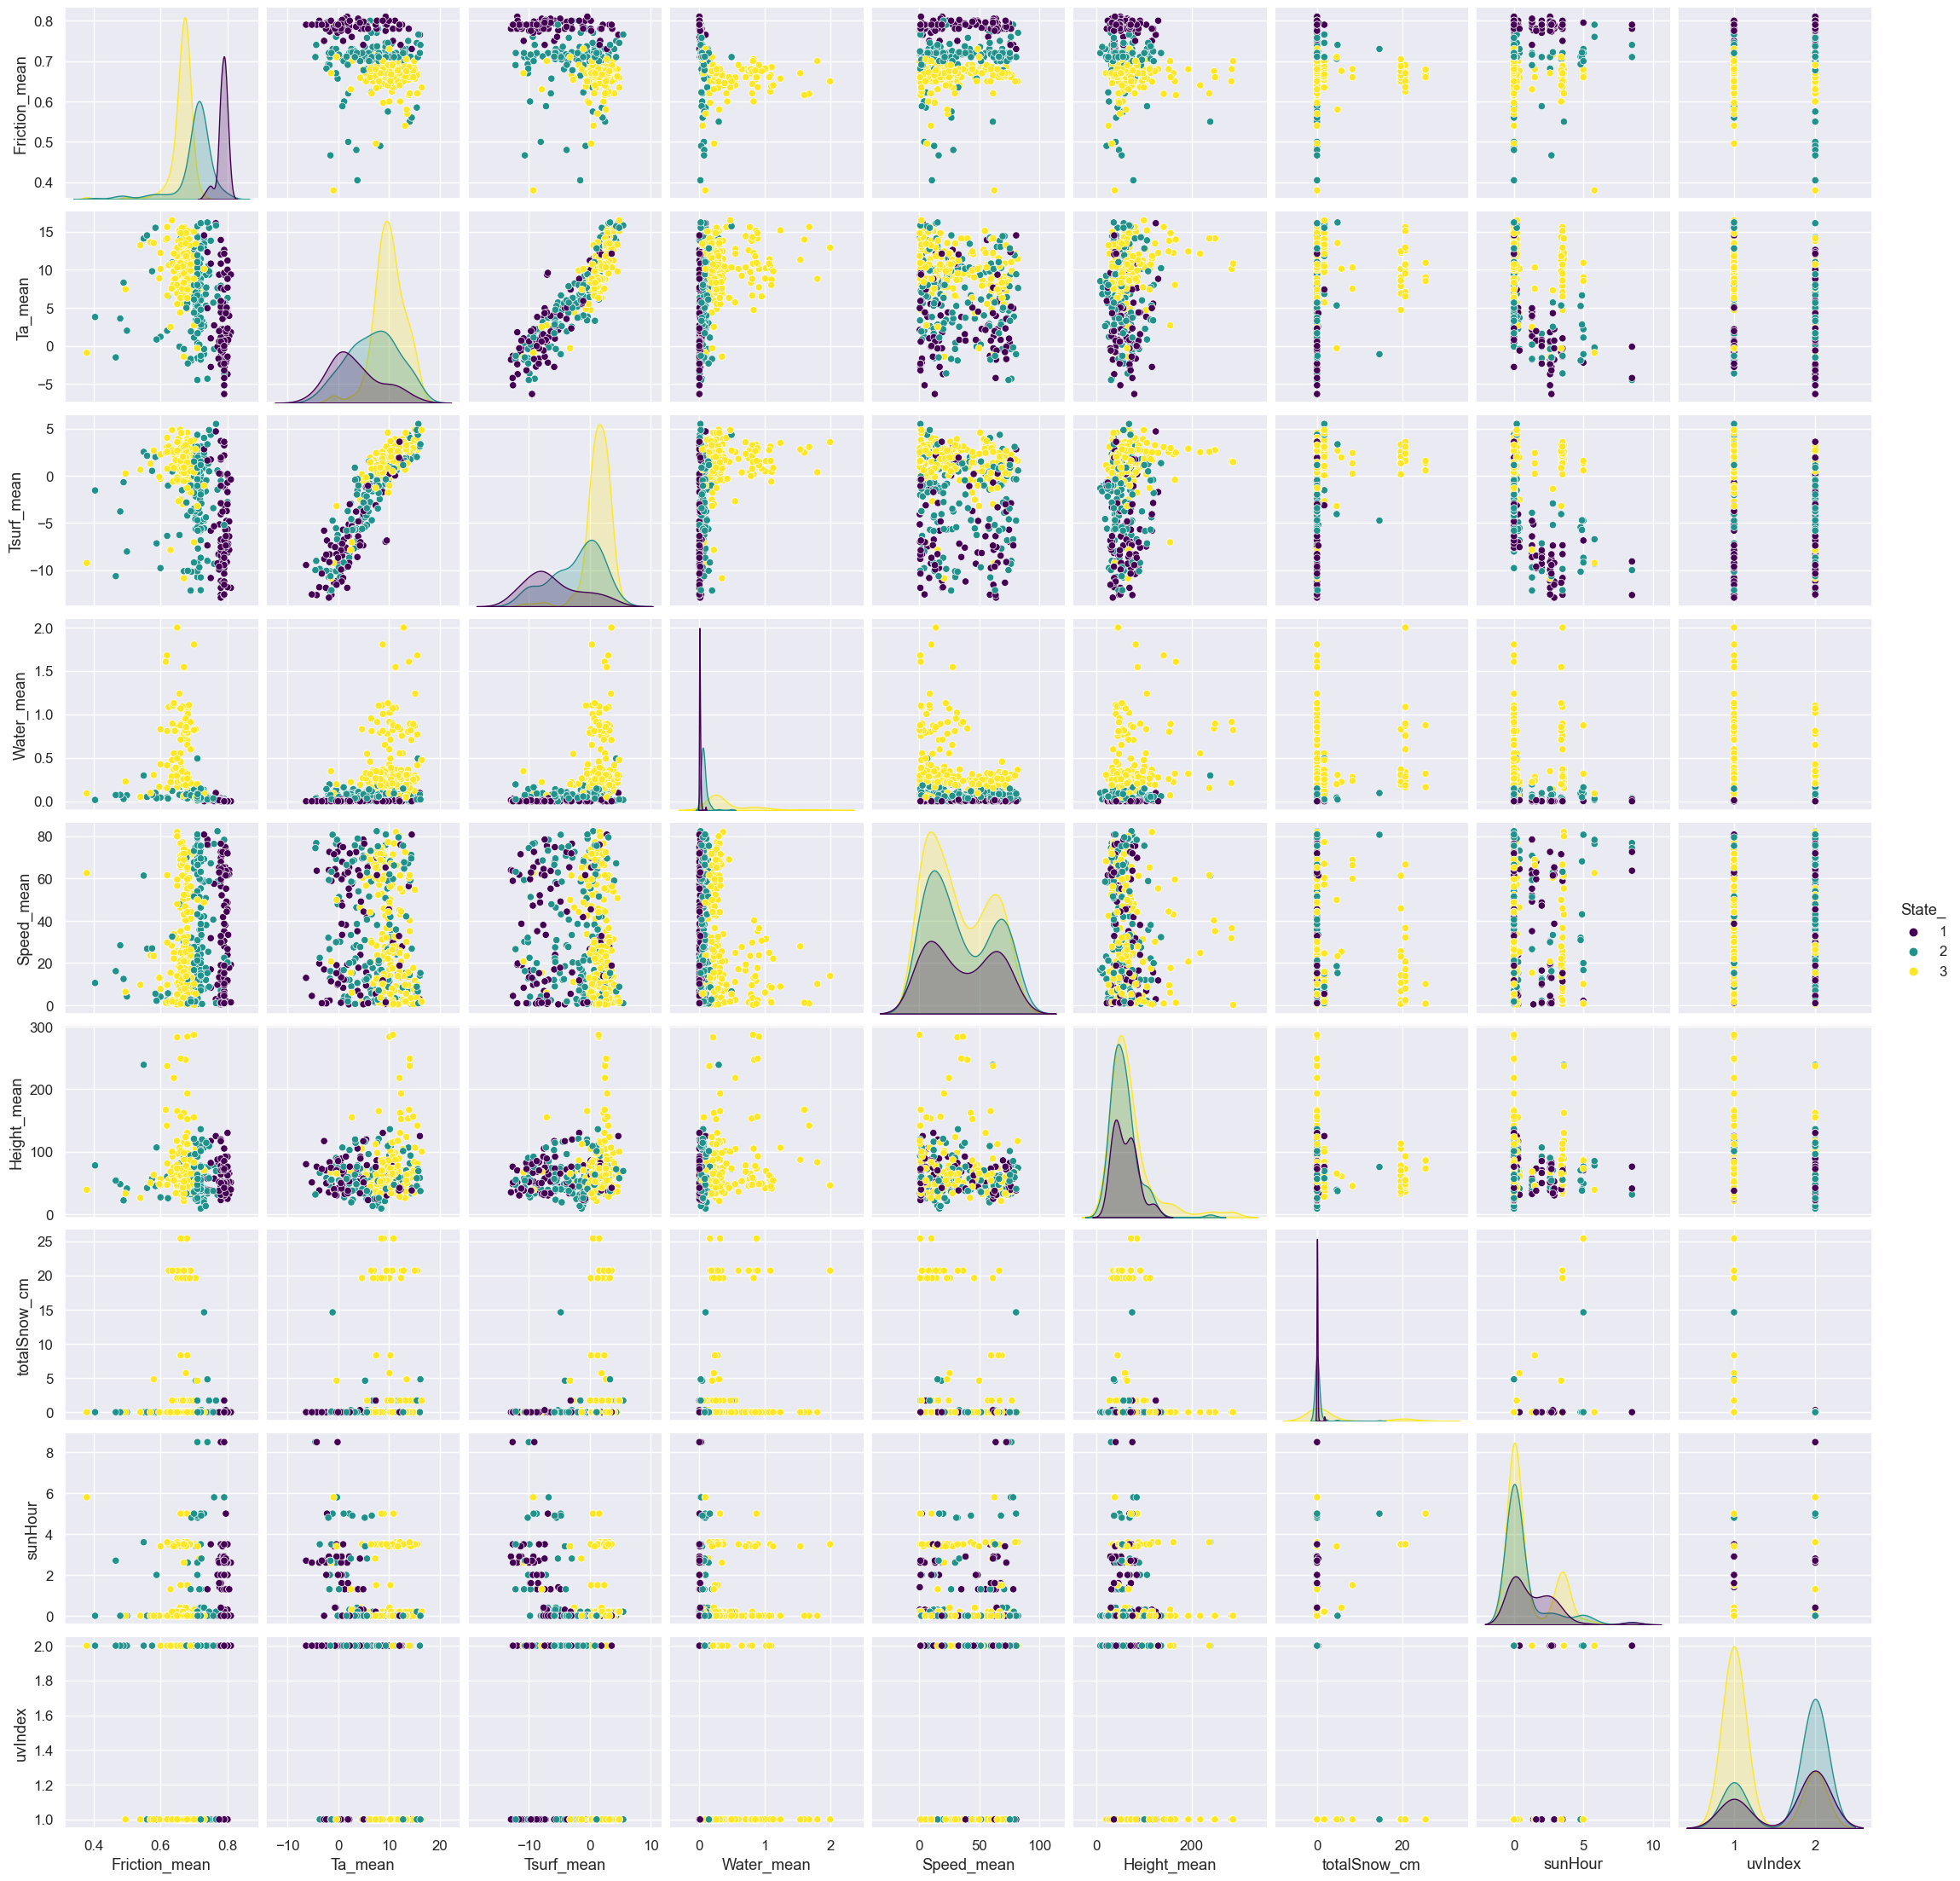

In [25]:
sns.pairplot(data = samplel4[['State_', 'Friction_mean', 'Ta_mean', 'Tsurf_mean',
       'Water_mean', 'Speed_mean', 'Height_mean', 'totalSnow_cm',
       'sunHour', 'uvIndex',]], hue='State_', palette='viridis')

Условные распределения Friction при условии humidity: здесь дискретизация по квантилям (для того, чтобы подвыборки были не самые малые в каждой группе)

C:\Users\Acer\AppData\Local\Temp\ipykernel_6160\150439677.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = sample['Friction_mean'], y = sample['humidity'], palette="viridis",
C:\Users\Acer\AppData\Local\Temp\ipykernel_6160\150439677.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x = sample['Friction_mean'], y = sample['humidity'], palette="viridis",


(24.03086233648784, 100.0)

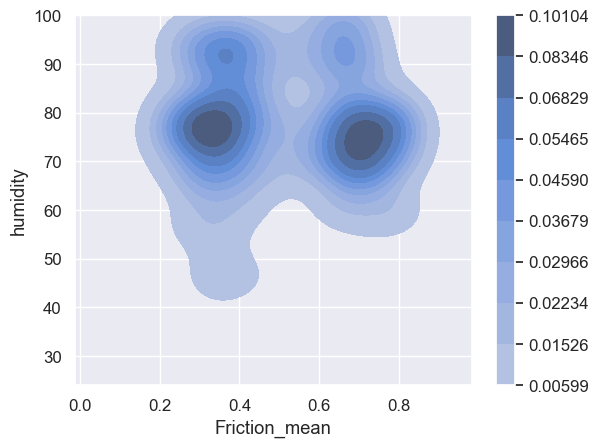

In [26]:
sns.kdeplot(x = sample['Friction_mean'], y = sample['humidity'], palette="viridis",
            shade=True, cbar=True)
plt.ylim(top = 100)

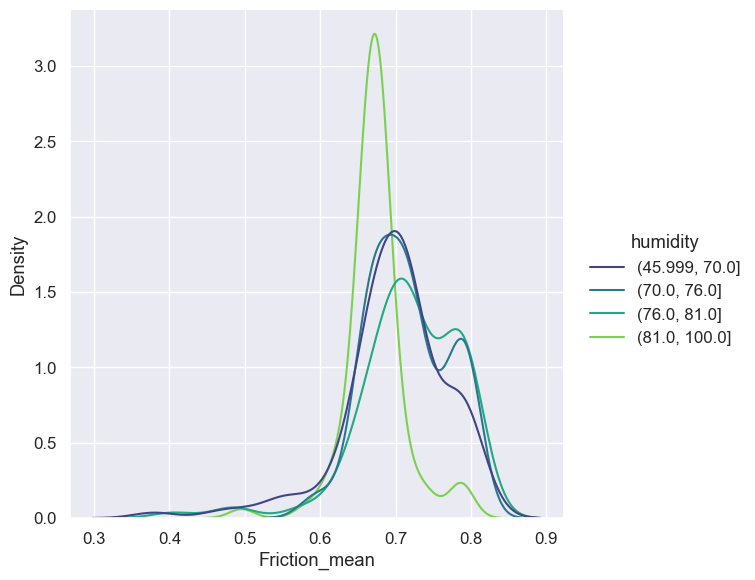

In [27]:
sns.displot(
    x=samplel4["Friction_mean"], hue=pd.qcut(samplel4['humidity'], q = [0, 0.25, 0.5, 0.75, 1]),
    kind="kde", height=6,
    palette="viridis",
)

Conditional expectation and variance:
If $\mathbf{E}(\xi \mid \eta)$ is a regression of $\xi$ on $\eta$, then $\mathbf{D}(\xi \mid \eta) = \mathbf{E}((\xi - \mathbf{E}(\xi \mid \eta))^2 \mid \eta)$ is a regression of $(\xi - \mathbf{E}(\xi \mid \eta))^2$ on $\eta$.

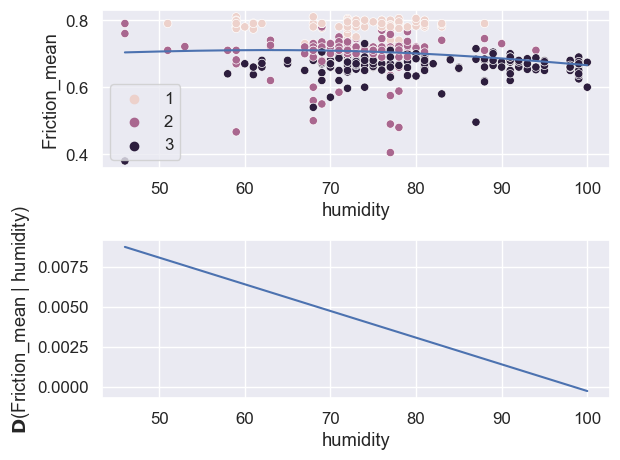

In [28]:
conditional_exp_var(samplel4, 'humidity', 'Friction_mean')

Условные распределения Friction при условии Height_mean: здесь дискретизация по квантилям (для того, чтобы подвыборки были не самые малые в каждой группе)

C:\Users\Acer\AppData\Local\Temp\ipykernel_6160\257420277.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x = sample['Friction_mean'], y = sample['Height_mean'], palette="viridis",


<AxesSubplot: xlabel='Friction_mean', ylabel='Height_mean'>

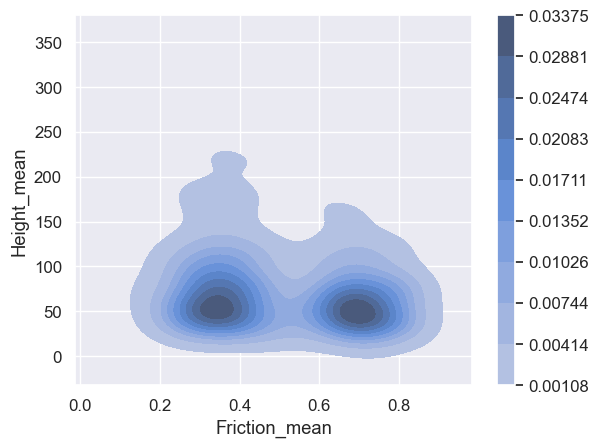

In [29]:
sns.kdeplot(x = sample['Friction_mean'], y = sample['Height_mean'], palette="viridis",
            fill=True, cbar=True)

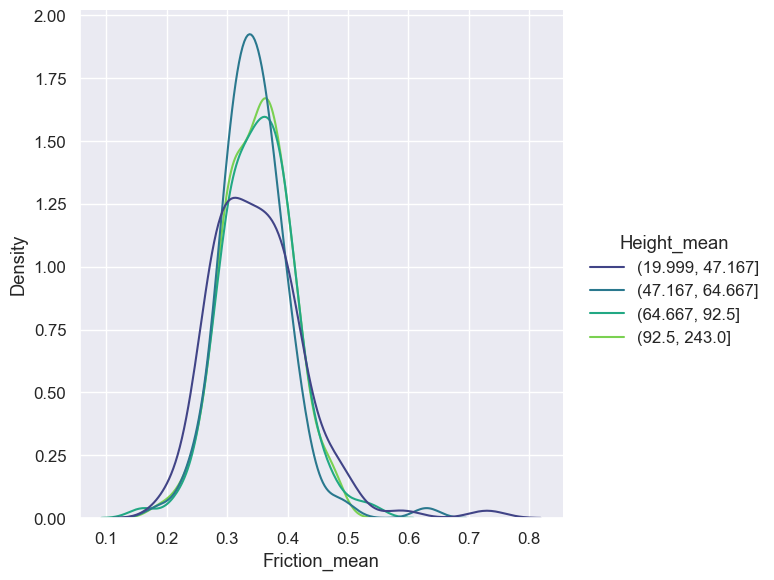

In [27]:
sns.displot(
    x=sampleb4["Friction_mean"], hue=pd.qcut(sampleb4['Height_mean'], q = [0, 0.25, 0.5, 0.75, 1]),
    kind="kde", height=6,
    palette="viridis"
)

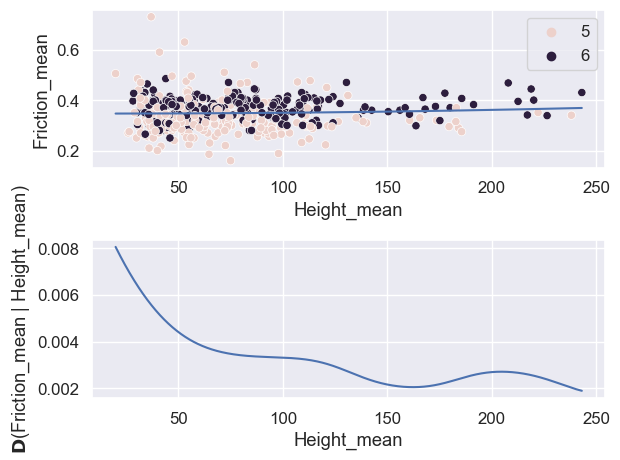

In [28]:
conditional_exp_var(sampleb4, 'Height_mean', 'Friction_mean')

In [29]:
samplel4.describe()

State_  Friction_mean     Ta_mean  Tsurf_mean  Water_mean  \
count  413.000000     413.000000  413.000000  413.000000  413.000000   
mean     2.232446       0.702652    7.521634   -1.397904    0.210166   
std      0.772220       0.062209    4.919456    4.483932    0.300220   
min      1.000000       0.380000   -6.300000  -12.900000    0.000000   
25%      2.000000       0.670000    4.000000   -4.602000    0.027000   
50%      2.000000       0.700000    8.500000    0.300000    0.092500   
75%      3.000000       0.735556   10.800000    1.940476    0.264000   
max      3.000000       0.810000   16.482143    5.492857    1.998750   

       Speed_mean  Height_mean    maxtempC    mintempC  totalSnow_cm  ...  \
count  413.000000   413.000000  413.000000  413.000000    413.000000  ...   
mean    33.798909    64.505240   -2.789346   -8.312349      1.668523  ...   
std     26.127387    38.597830    4.500990    5.035483      5.301449  ...   
min      0.220000     9.000000  -14.000000  -19.000000      0.000000  ...   
25%     10.109091    41.000000   -6.000000  -12.000000      0.000000  ...   
50%     27.400000    55.120000   -2.000000   -8.000000      0.000000  ...   
75%     60.350000    73.090909    1.000000   -5.000000      0.000000  ...   
max     82.400000   287.000000    6.000000    3.000000     25.400000  ...   

       HeatIndexC  WindChillC  WindGustKmph  cloudcover    humidity  \
count  413.000000  413.000000     413.00000  413.000000  413.000000   
mean    -3.549637   -8.268765      21.96368   60.382567   76.496368   
std      4.774079    6.267726       8.27302   31.835040   10.371877   
min    -15.000000  -25.000000       4.00000    3.000000   46.000000   
25%     -7.000000  -12.000000      16.00000   35.000000   70.000000   
50%     -2.000000   -7.000000      21.00000   62.000000   76.000000   
75%      1.000000   -3.000000      28.00000   91.000000   81.000000   
max      6.000000    3.000000      51.00000  100.000000  100.000000   

         precipMM     pressure       tempC  visibility  windspeedKmph  
count  413.000000   413.000000  413.000000  413.000000     413.000000  
mean     0.144794  1008.067797   -3.569007    8.777240      13.368039  
std      0.390610     7.674839    4.764677    2.473896       4.651458  
min      0.000000   991.000000  -15.000000    1.000000       3.000000  
25%      0.000000  1002.000000   -7.000000   10.000000      11.000000  
50%      0.000000  1007.000000   -2.000000   10.000000      13.000000  
75%      0.000000  1013.000000    1.000000   10.000000      15.000000  
max      2.800000  1030.000000    6.000000   10.000000      26.000000  

[8 rows x 24 columns]

Корреляционная матрица по выборке с $State < 4$

In [30]:
samplel4.drop(columns=['State_']).corr()

Friction_mean   Ta_mean  Tsurf_mean  Water_mean  Speed_mean  \
Friction_mean       1.000000 -0.355478   -0.401647   -0.401350    0.136358   
Ta_mean            -0.355478  1.000000    0.913878    0.371971   -0.130991   
Tsurf_mean         -0.401647  0.913878    1.000000    0.403017   -0.084051   
Water_mean         -0.401350  0.371971    0.403017    1.000000   -0.227352   
Speed_mean          0.136358 -0.130991   -0.084051   -0.227352    1.000000   
Height_mean        -0.088557  0.145013    0.120611    0.247534   -0.133616   
maxtempC           -0.454560  0.637569    0.763082    0.510977   -0.031538   
mintempC           -0.387187  0.442241    0.562094    0.476730    0.009100   
totalSnow_cm       -0.165505  0.147593    0.225916    0.279541   -0.180365   
sunHour             0.060131 -0.390988   -0.386108    0.050000    0.023127   
uvIndex             0.207294 -0.309704   -0.331296   -0.338711    0.054023   
DewPointC          -0.441443  0.661606    0.771736    0.571439   -0.113381   
FeelsLikeC         -0.431004  0.560286    0.670289    0.467797   -0.039095   
HeatIndexC         -0.448369  0.632751    0.739250    0.489517   -0.057956   
WindChillC         -0.431004  0.560286    0.670289    0.467797   -0.039095   
WindGustKmph        0.140348  0.026068   -0.049291   -0.217573    0.014767   
cloudcover         -0.301111  0.403499    0.452720    0.465931   -0.197437   
humidity           -0.165868  0.327808    0.379720    0.438761   -0.179561   
precipMM           -0.213260  0.218225    0.279519    0.454164   -0.177372   
pressure            0.120389 -0.390287   -0.395768   -0.132192   -0.071016   
tempC              -0.448849  0.631163    0.738099    0.491028   -0.054867   
visibility          0.256108 -0.298093   -0.374669   -0.474606    0.266461   
windspeedKmph       0.133148  0.005133   -0.043206   -0.124014   -0.083373   

               Height_mean  maxtempC  mintempC  totalSnow_cm   sunHour  ...  \
Friction_mean    -0.088557 -0.454560 -0.387187     -0.165505  0.060131  ...   
Ta_mean           0.145013  0.637569  0.442241      0.147593 -0.390988  ...   
Tsurf_mean        0.120611  0.763082  0.562094      0.225916 -0.386108  ...   
Water_mean        0.247534  0.510977  0.476730      0.279541  0.050000  ...   
Speed_mean       -0.133616 -0.031538  0.009100     -0.180365  0.023127  ...   
Height_mean       1.000000  0.187892  0.139631     -0.026517  0.009263  ...   
maxtempC          0.187892  1.000000  0.866600      0.225463 -0.208495  ...   
mintempC          0.139631  0.866600  1.000000      0.191366 -0.103633  ...   
totalSnow_cm     -0.026517  0.225463  0.191366      1.000000  0.456990  ...   
sunHour           0.009263 -0.208495 -0.103633      0.456990  1.000000  ...   
uvIndex          -0.070157 -0.308734 -0.368146     -0.314778 -0.057752  ...   
DewPointC         0.210528  0.931914  0.836745      0.354237 -0.184406  ...   
FeelsLikeC        0.161603  0.952117  0.863740      0.154530 -0.192160  ...   
HeatIndexC        0.177468  0.975797  0.865181      0.197530 -0.225807  ...   
WindChillC        0.161603  0.952117  0.863740      0.154530 -0.192160  ...   
WindGustKmph     -0.019888 -0.389911 -0.491086      0.089393  0.000628  ...   
cloudcover        0.121332  0.541943  0.456720      0.348560 -0.078547  ...   
humidity          0.159560  0.249397  0.246682      0.563703  0.076274  ...   
precipMM          0.102467  0.322224  0.329454      0.634660  0.359254  ...   
pressure         -0.083559 -0.248864 -0.147419     -0.087281  0.085205  ...   
tempC             0.176421  0.975310  0.866332      0.199011 -0.225065  ...   
visibility       -0.133862 -0.412332 -0.366250     -0.753385 -0.279853  ...   
windspeedKmph     0.009188 -0.332033 -0.386686      0.212889  0.038098  ...   

               HeatIndexC  WindChillC  WindGustKmph  cloudcover  humidity  \
Friction_mean   -0.448369   -0.431004      0.140348   -0.301111 -0.165868   
Ta_mean          0.632751    0.560286      0.026068    0.403499  0.327808   
Tsurf_mean    

Значимость корреляции:
Пусть $\hat{\rho}_n$ --- оценка $\rho = \rho(\xi, \eta)$ по выборке, $(\xi, \eta)^T \sim N(\mu, \Sigma)$.
Проверяем гипотезу $H_0: \rho = 0$.
Статистика: $$ t = \sqrt{n-2}\frac{\hat{\rho}_n}{\sqrt{1-\hat{\rho}^2_n}} \sim t(n-2) $$
если же данные не нормальны, то пользуемся предельными критическими значениями ст. норм. распределения.
После $z$-преобразования:
$$ z = \frac{1}{2} \ln \frac{1+\hat\rho_n}{1-\hat\rho_n},\ z_0 = \frac{1}{2} \ln \frac{1+\rho_0}{1-\rho_0} $$
его можно привести к виду:
$$ \sqrt{n-3}(z-z_0) \to^d N(0, 1) $$

Результаты применения критерия проверки значимости корреляции Friction с остальными признаками для этой группы наблюдений. Здесь слева направо даны коэффициент корреляции, левая и правая границы доверительного интервала для коэф. корреляции и p-value; гипотеза проверялась на уровне значимости $\alpha = 0.05$. При нормально распределённых данных статистика этого теста имеет точное распределение --- р. Стьюдента с $n-3$ степенями свободы, иначе мы рассматриваем асипмтотический тест с предельным стандартным нормальным распределением. (доказательство этого http://personal.psu.edu/drh20/asymp/fall2002/lectures/ln08.pdf)

Выделим признаки, которые значимо коррелируют с Friction

In [31]:
corr_res_l4 = corr_significance.multiple_corr_test(samplel4, pivot = 'Friction_mean',
                                     regressors=samplel4.columns.difference(['Friction_mean', 'State_']))
corr_res_l4

$\rho$      left     right       p-value
DewPointC     -0.441443 -0.515959 -0.360296  3.989176e-21
FeelsLikeC    -0.431004 -0.506436 -0.349025  4.120532e-20
HeatIndexC    -0.448369 -0.522268 -0.367787  8.100522e-22
Height_mean   -0.088557 -0.183483  0.008006  7.221487e-02
Speed_mean     0.136358  0.040395  0.229829  5.508267e-03
Ta_mean       -0.355478 -0.436983 -0.268182  9.557084e-14
Tsurf_mean    -0.401647 -0.479555 -0.317456  1.925895e-17
Water_mean    -0.401350 -0.479283 -0.317137  2.043193e-17
WindChillC    -0.431004 -0.506436 -0.349025  4.120532e-20
WindGustKmph   0.140348  0.044456  0.233678  4.266880e-03
cloudcover    -0.301111 -0.386379 -0.210740  4.202592e-10
humidity      -0.165868 -0.258229 -0.070502  7.141603e-04
maxtempC      -0.454560 -0.527900 -0.374492  1.888100e-22
mintempC      -0.387187 -0.466261 -0.301975  3.204025e-16
precipMM      -0.213260 -0.303509 -0.119219  1.235629e-05
pressure       0.120389  0.024176  0.214393  1.436138e-02
sunHour        0.060131 -0.036576  0.155722  2.226903e-01
tempC         -0.448849 -0.522705 -0.368307  7.242582e-22
totalSnow_cm  -0.165505 -0.257881 -0.070131  7.339269e-04
uvIndex        0.207294  0.113061  0.297831  2.174664e-05
visibility     0.256108  0.163658  0.344098  1.311608e-07
windspeedKmph  0.133148  0.037131  0.226730  6.733028e-03

Попробуем построить первую линейную модель по признакам со значимой корреляцией.

In [32]:
set_for_model1 = corr_res_l4[corr_res_l4['p-value'] < 0.05].index.values.tolist()
set_for_model1

['DewPointC',
 'FeelsLikeC',
 'HeatIndexC',
 'Speed_mean',
 'Ta_mean',
 'Tsurf_mean',
 'Water_mean',
 'WindChillC',
 'WindGustKmph',
 'cloudcover',
 'humidity',
 'maxtempC',
 'mintempC',
 'precipMM',
 'pressure',
 'tempC',
 'totalSnow_cm',
 'uvIndex',
 'visibility',
 'windspeedKmph']

In [33]:
from scipy.spatial.distance import mahalanobis


def plot_mahalanobis(data, features):
    mean = data[features].mean()
    var = data[features].cov()
    ivar = np.linalg.inv(var.values)
    mahdist = data[features].apply(axis=1, func=lambda x: mahalanobis(x, mean, ivar))
    sns.jointplot(x=np.arange(start=1, stop=data.shape[0] + 1, step=1), y=mahdist).ax_marg_x.remove()
    plt.xlabel("Individuals")
    plt.ylabel("Mahalanobis distance")
    return mahdist

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.api import qqplot
from scipy.stats import shapiro

In [36]:
def linear_regression_report(data: pd.DataFrame, target: str, features: list, model):
    lm = model.fit(data[features], data[target])
    r2 = r2_score(y_true=data[target], y_pred=lm.predict(data[features]))
    mse = mean_squared_error(y_true=data[target], y_pred=lm.predict(data[features]))
    residuals = data[target] - lm.predict(data[features])
    m = residuals.mean()
    std = residuals.std()

    sns.histplot(x = residuals)
    plt.title("Residuals distribution")
    plt.xlabel("Residuals")
    qqplot((residuals-m)/std, line='45')

    N = data.shape[0]
    k = len(features)
    r2adj = 1 - (1-r2)*(N - 1)/(N-k-1)

    shapiro_results = shapiro(residuals)
    return {'model': model,
            'r2_score': r2,
            'r2adj_score': r2adj,
            'mse': mse,
            'residuals': residuals,
            'shapiro': shapiro_results}

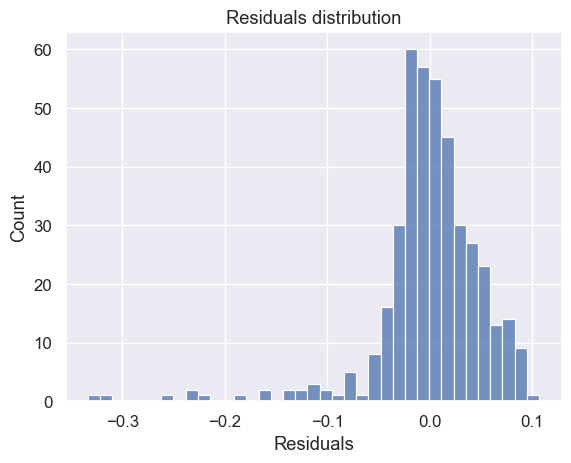

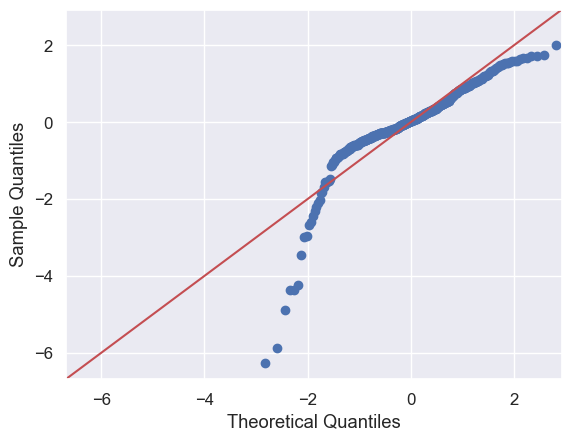

In [37]:
res1 = linear_regression_report(data = samplel4, target='Friction_mean',
                                features=set_for_model1, model=LinearRegression())

R2-score и MSE у неё соответственно. Выглядит невпечатляюще + распределение остатков отнюдь не нормальное.

In [38]:
res1['r2_score'], res1['r2adj_score'], res1['mse']

(0.26994285408111773, 0.23269504051382783, 0.0028184701460214354)

Критерий Шапиро-Уилка отвергает нормальность остатков

In [39]:
res1['shapiro']

ShapiroResult(statistic=0.8331531882286072, pvalue=1.9945352130506532e-20)

Отберём признаки по корреляциям с другими и по возможности частной корреляции с целевым

In [40]:
samplel4[['Friction_mean']+set_for_model1].corr()

Friction_mean  DewPointC  FeelsLikeC  HeatIndexC  Speed_mean  \
Friction_mean       1.000000  -0.441443   -0.431004   -0.448369    0.136358   
DewPointC          -0.441443   1.000000    0.908075    0.936045   -0.113381   
FeelsLikeC         -0.431004   0.908075    1.000000    0.978007   -0.039095   
HeatIndexC         -0.448369   0.936045    0.978007    1.000000   -0.057956   
Speed_mean          0.136358  -0.113381   -0.039095   -0.057956    1.000000   
Ta_mean            -0.355478   0.661606    0.560286    0.632751   -0.130991   
Tsurf_mean         -0.401647   0.771736    0.670289    0.739250   -0.084051   
Water_mean         -0.401350   0.571439    0.467797    0.489517   -0.227352   
WindChillC         -0.431004   0.908075    1.000000    0.978007   -0.039095   
WindGustKmph        0.140348  -0.397926   -0.579871   -0.429639    0.014767   
cloudcover         -0.301111   0.635673    0.479462    0.535683   -0.197437   
humidity           -0.165868   0.522192    0.158684    0.201154   -0.179561   
maxtempC           -0.454560   0.931914    0.952117    0.975797   -0.031538   
mintempC           -0.387187   0.836745    0.863740    0.865181    0.009100   
precipMM           -0.213260   0.483740    0.281630    0.301144   -0.177372   
pressure            0.120389  -0.255631   -0.145492   -0.215862   -0.071016   
tempC              -0.448849   0.935699    0.977406    0.999263   -0.054867   
totalSnow_cm       -0.165505   0.354237    0.154530    0.197530   -0.180365   
uvIndex             0.207294  -0.444271   -0.280314   -0.316077    0.054023   
visibility          0.256108  -0.578902   -0.346526   -0.377637    0.266461   
windspeedKmph       0.133148  -0.285954   -0.538414   -0.370799   -0.083373   

                Ta_mean  Tsurf_mean  Water_mean  WindChillC  WindGustKmph  \
Friction_mean -0.355478   -0.401647   -0.401350   -0.431004      0.140348   
DewPointC      0.661606    0.771736    0.571439    0.908075     -0.397926   
FeelsLikeC     0.560286    0.670289    0.467797    1.000000     -0.579871   
HeatIndexC     0.632751    0.739250    0.489517    0.978007     -0.429639   
Speed_mean    -0.130991   -0.084051   -0.227352   -0.039095      0.014767   
Ta_mean        1.000000    0.913878    0.371971    0.560286      0.026068   
Tsurf_mean     0.913878    1.000000    0.403017    0.670289     -0.049291   
Water_mean     0.371971    0.403017    1.000000    0.467797     -0.217573   
WindChillC     0.560286    0.670289    0.467797    1.000000     -0.579871   
WindGustKmph   0.026068   -0.049291   -0.217573   -0.579871      1.000000   
cloudcover     0.403499    0.452720    0.465931    0.479462     -0.099395   
humidity       0.327808    0.379720    0.438761    0.158684     -0.022617   
maxtempC       0.637569    0.763082    0.510977    0.952117     -0.389911   
mintempC       0.442241    0.562094    0.476730    0.863740     -0.491086   
precipMM       0.218225    0.279519    0.454164    0.281630     -0.080313   
pressure      -0.390287   -0.395768   -0.132192   -0.145492     -0.206807   
tempC          0.631163    0.738099    0.491028    0.977406     -0.427241   
totalSnow_cm   0.147593    0.225916    0.279541    0.154530      0.089393   
uvIndex       -0.309704   -0.331296   -0.338711   -0.280314      0.012025   
visibility    -0.298093   -0.374669   -0.474606   -0.346526      0.108590   
windspeedKmph  0.005133   -0.043206   -0.124014   -0.538414      0.891456   

               ...  humidity  maxtempC  mintempC  precipMM  pressure  \
Friction_mean  ... -0.165868 -0.454560 -0.387187 -0.213260  0.120389   
DewPointC      ...  0.522192  0.931914  0.836745  0.483740 -0.255631   
FeelsLikeC     ...  0.158684  0.952117  0.863740  0.281630 -0.145492   
HeatIndexC     ...  0.201154  0.975797  0.865181  0.301144 -0.215862   
Speed_mean     ... -0.179561 -0.031538  0.009100 -0.177372 -0.071016   
Ta_mean        ...  0.327808  0.637569  0.442241  0.218225 -0.390287   
Tsurf_mean     ...  0.379720  0.763082  0.562094  0.279519 -0.395768   
Water

Text(0.5, 1.0, 'Correlation heat map on sample with State < 4')

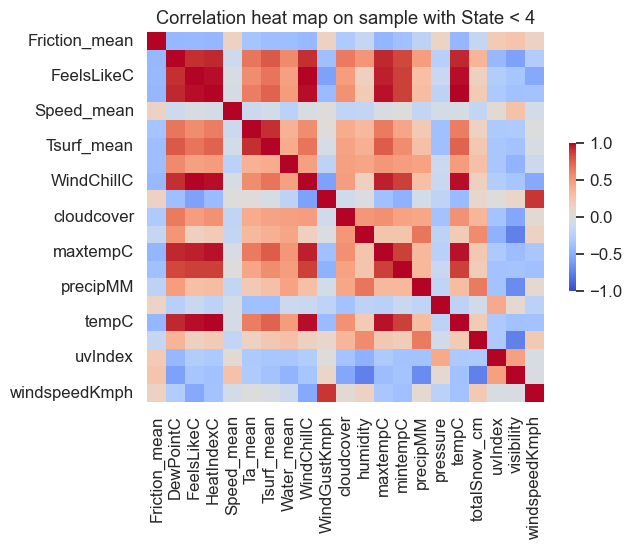

In [41]:
sns.heatmap(samplel4[['Friction_mean']+set_for_model1].corr(),
            cmap = "coolwarm",
            cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
            vmin=-1, vmax=1, center=0, annot_kws={"fontsize":8})
plt.title("Correlation heat map on sample with State < 4")

Text(0.5, 1.0, 'Correlation heat map on sample with State < 4')

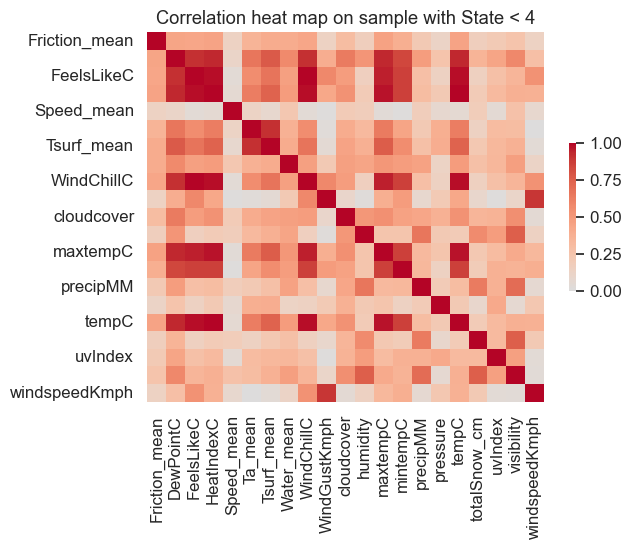

In [42]:
sns.heatmap(samplel4[['Friction_mean']+set_for_model1].corr().apply(np.abs),
            cmap = "coolwarm",
            cbar_kws = {'shrink': .4,
                                'ticks' : [0, 0.25, 0.5, 0.75, 1]},
            vmin=0, vmax=1, center=0, annot_kws={"fontsize":8})
plt.title("Correlation heat map on sample with State < 4")

Как видно, целая группа температурных признаков коррелируют друг с другом. Для дальнейшего из них выберем только Tsurf_mean. Также уберём признак WindGustKmph, так как он сильно коррелирует с признаком windspeedKmph, а ещё признак visibility дискретен (принимает значения от 1 до 10). Также windspeedKmph и Wind_speed обозначают одно и то же, но первый из них более дискретный.

Частная корреляция (partial correlation)
$$ \rho(\xi, \eta \mid \alpha_1, \dots, \alpha_n) = \rho(\xi - \widetilde{\xi}, \eta - \widetilde{\eta}) $$
$$ \widetilde{\xi} = \arg \min_{\xi^* \in K} \mathbf{E} (\xi - \xi^*)^2 $$
$$ \widetilde{\eta} = \arg \min_{\eta^* \in K} \mathbf{E} (\eta - \eta^*)^2 $$
$$ K = \{a_0 + a_1 \alpha_1 + \dots + a_n \alpha_n\} $$

In [43]:
partial_corr.par_corr(samplel4[['Friction_mean']+set_for_model1])

Friction_mean  DewPointC  FeelsLikeC  HeatIndexC  Speed_mean  \
Friction_mean       1.000000   0.033063   -0.001310   -0.002148    0.085740   
DewPointC           0.033063   1.000000   -0.003759    0.288472   -0.053125   
FeelsLikeC         -0.001310  -0.003759    1.000000   -0.003509   -0.001622   
HeatIndexC         -0.002148   0.288472   -0.003509    1.000000   -0.040409   
Speed_mean          0.085740  -0.053125   -0.001622   -0.040409    1.000000   
Ta_mean             0.013032   0.025449    0.002379    0.047348   -0.116297   
Tsurf_mean         -0.066378   0.016672   -0.005069   -0.000801    0.026935   
Water_mean         -0.185686  -0.037440   -0.000883   -0.021374   -0.151109   
WindChillC         -0.000011  -0.001664    1.000000   -0.000454   -0.001925   
WindGustKmph       -0.059800  -0.038675    0.006435    0.002169    0.154300   
cloudcover         -0.042800  -0.045049   -0.057268    0.012749   -0.078180   
humidity           -0.006736   0.926489    0.001033   -0.288525    0.081040   
maxtempC           -0.038678  -0.013049    0.004767    0.051177    0.132945   
mintempC           -0.011331  -0.030336   -0.001508    0.021155    0.093568   
precipMM           -0.016057  -0.080415   -0.000404   -0.067453   -0.007317   
pressure           -0.028285   0.061299    0.001587   -0.085670   -0.093852   
tempC              -0.011400  -0.068438    0.000166    0.890238    0.047327   
totalSnow_cm       -0.037616  -0.075417   -0.004191   -0.088344    0.015062   
uvIndex             0.041843  -0.099118    0.001120    0.130466   -0.029337   
visibility         -0.013526   0.139898    0.000370   -0.211511    0.142066   
windspeedKmph       0.057674   0.289988    0.001325    0.062930   -0.138904   

                Ta_mean  Tsurf_mean  Water_mean  WindChillC  WindGustKmph  \
Friction_mean  0.013032   -0.066378   -0.185686   -0.000011     -0.059800   
DewPointC      0.025449    0.016672   -0.037440   -0.001664     -0.038675   
FeelsLikeC     0.002379   -0.005069   -0.000883    1.000000      0.006435   
HeatIndexC     0.047348   -0.000801   -0.021374   -0.000454      0.002169   
Speed_mean    -0.116297    0.026935   -0.151109   -0.001925      0.154300   
Ta_mean        1.000000    0.779064    0.110417    0.000002      0.147463   
Tsurf_mean     0.779064    1.000000   -0.112065    0.000632      0.054187   
Water_mean     0.110417   -0.112065    1.000000   -0.004169     -0.051900   
WindChillC     0.000002    0.000632   -0.004169    1.000000     -0.004398   
WindGustKmph   0.147463    0.054187   -0.051900   -0.004398      1.000000   
cloudcover     0.009118   -0.144030    0.093863    0.012569     -0.028649   
humidity      -0.011782    0.077777    0.066599   -0.001333     -0.078112   
maxtempC      -0.207492    0.267267    0.180923    0.000321      0.202445   
mintempC      -0.033243   -0.096511    0.005510    0.001599     -0.255500   
precipMM      -0.018461   -0.070973    0.185457    0.000779      0.077796   
pressure      -0.065051   -0.099871    0.086798    0.001044      0.081977   
tempC         -0.024238   -0.000696    0.065346    0.000628      0.083718   
totalSnow_cm  -0.114671    0.055150   -0.071359   -0.001434      0.072154   
uvIndex       -0.000504    0.051370   -0.095195    0.005989     -0.200108   
visibility    -0.016280    0.026309    0.000612   -0.000239      0.029262   
windspeedKmph -0.073237   -0.008836   -0.070111   -0.000868      0.448245   

               ...  humidity  maxtempC  mintempC  precipMM  pressure  \
Friction_mean  ... -0.006736 -0.038678 -0.011331 -0.016057 -0.028285   
DewPointC      ...  0.926489 -0.013049 -0.030336 -0.080415  0.061299   
FeelsLikeC     ...  0.001033  0.004767 -0.001508 -0.000404  0.001587   
HeatIndexC     ... -0.288525  0.051177  0.021155 -0.067453 -0.085670   
Speed_mean     ...  0.081040  0.132945  0.093568 -0.007317 -0.093852   
Ta_mean        ... -0.011782 -0.207492 -0.033243 -0.018461 -0.065051   
Tsurf_mean     ...  0.077777  0.267267 -0.096511 -0.070973 -0.099871   
Water

Взглянув на матрицу частных корреляций, мы видим, что с целевым признаком нет выделяющихся связей.

Text(0.5, 1.0, 'Partial correlation heat map on sample with State < 4')

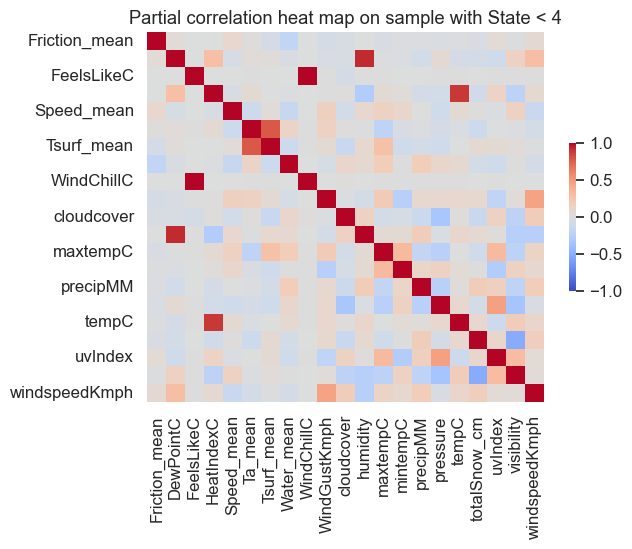

In [44]:
sns.heatmap(partial_corr.par_corr(samplel4[['Friction_mean']+set_for_model1]),
            cmap = "coolwarm",
            cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
            vmin=-1, vmax=1, center=0, annot_kws={"fontsize":8})
plt.title("Partial correlation heat map on sample with State < 4")

Признаки, которые частным образом коррелируют с Friction_mean, отсутствуют здесь, потому ничего не остаётся, как работать со всеми признаками, которые были отображены из анализа мультиколлинеарности.

Набор отобранных признаков:

In [45]:
set_for_model2 = ['Tsurf_mean',
       'Water_mean', 'Speed_mean', 'totalSnow_cm',
        'uvIndex', 'cloudcover', 'humidity', 'precipMM',
       'pressure']

Теперь матрица ковариации не должна быть вырожденной, потому можно рассмотреть выбросы в данных по отношению к распределению. Для этого у нас есть расстояние Махаланобиса + гистограмма для целевого признака.

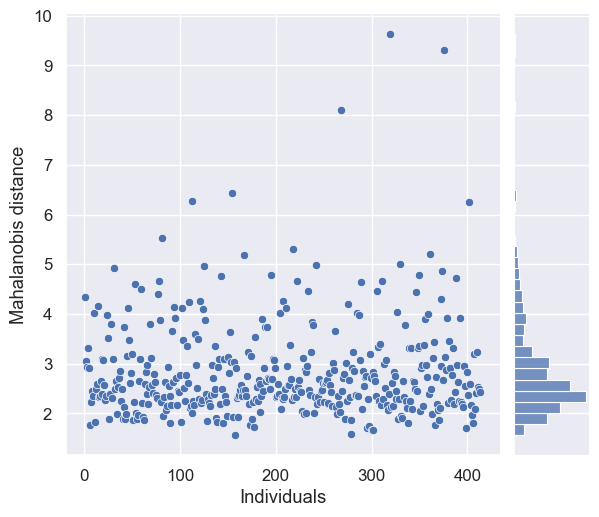

In [46]:
mdist = plot_mahalanobis(samplel4, set_for_model2)

<AxesSubplot: xlabel='Friction_mean', ylabel='Count'>

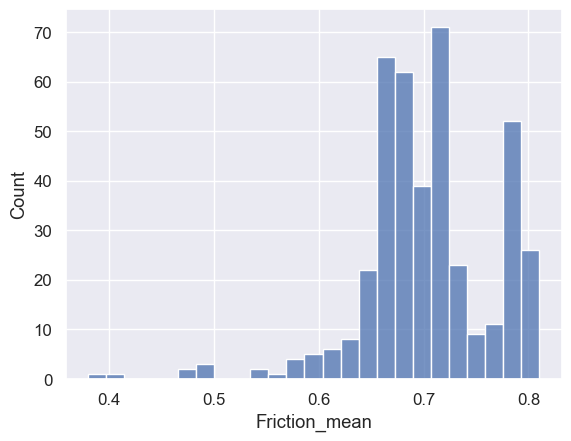

In [47]:
sns.histplot(x = samplel4['Friction_mean'])

Можем заключить, что наблюдение с расстоянием Махаланобиса > 8 или с Friction_mean < 0.5 будут выбросами в модели.

In [48]:
samplel40 = samplel4[(mdist < 8) & (samplel4['Friction_mean'] > 0.5)]

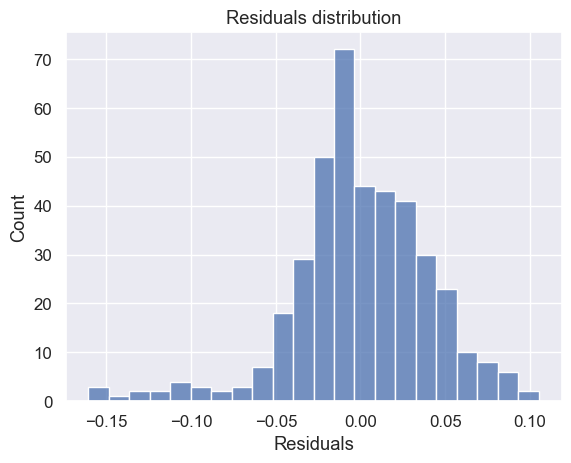

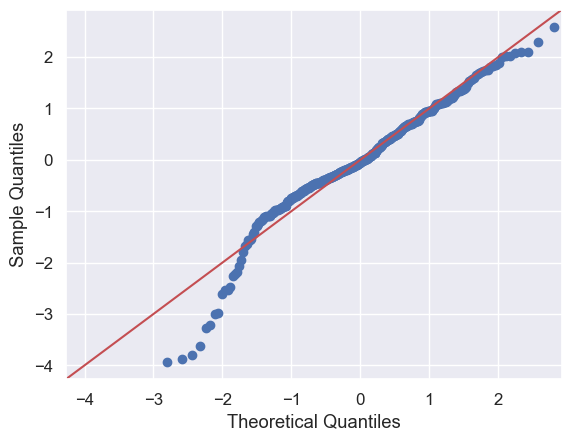

In [49]:
res2 = linear_regression_report(data = samplel40, target='Friction_mean',
                                features=set_for_model2, model=LinearRegression())

In [50]:
res2['r2_score'], res2['r2adj_score'], res2['mse']

(0.4209131505876247, 0.40765161968505115, 0.0016592261938512267)

In [51]:
res2['shapiro']

ShapiroResult(statistic=0.957374095916748, pvalue=2.0824528768059736e-09)

In [52]:
import statsmodels.api as sm

X = sm.add_constant(samplel40[set_for_model2])
sm.OLS(samplel40['Friction_mean'], X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Friction_mean   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     31.74
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           1.13e-41
Time:                        21:11:07   Log-Likelihood:                 718.05
No. Observations:                 403   AIC:                            -1416.
Df Residuals:                     393   BIC:                            -1376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6627      0.330      2.007      0.045       0.014       1.312
Tsurf_mean      -0.0044      0.001     -7.900      0.000      -0.006      -0.003
Water_mean      -0.0641      0.009     -6.954      0.000      -0.082      -0.046
Speed_mean    3.045e-06   8.24e-05      0.037      0.971      -0.000       0.000
totalSnow_cm    -0.0005      0.001     -0.821      0.412      -0.002       0.001
uvIndex          0.0093      0.005      1.819      0.070      -0.001       0.019
cloudcover      -0.0002   8.63e-05     -1.939      0.053      -0.000    2.37e-06
humidity         0.0009      0.000      3.002      0.003       0.000       0.002
precipMM        -0.0081      0.010     -0.788      0.431      -0.028       0.012
pressure     -2.119e-05      0.000     -0.064      0.949      -0.001       0.001
==============================================================================
Omnibus:                       52.626   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.325
Skew:                          -0.729   Prob(JB):                     2.22e-23
Kurtosis:                       5.022   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Пусть $y = X w + \varepsilon$, $w \in \mathbb{R}^{p+1}$ и $\varepsilon \sim N(0, \sigma^2 I)$ и известно, что $\widehat{w} = (X^TX)^{-1}X^Ty$ и $\widehat{y} = X(X^TX)^{-1}X^Ty = Hy$.
Residual для $y_i$: $r_i = y_i - \widehat{y_i}$, deleted residual: $r_i^{(i)} = y_i - \widehat{y_i}^{(i)}$, $\widehat{y_i}^{(i)}$ --- оценка y_i по выборке без $i$-ого индивида.
Из определения, $\mathbb{D}r_i = \sigma^2(1-h_{ii})$ и тогда $\frac{r_{i}}{\widehat{\sigma}\sqrt{1-h_{ii}}}$ --- стьюдентизированный остаток, $\widehat{\sigma^2}=\frac{1}{n-p}\sum_{k=1}^n(y_k-\widehat{y_k})^2$.
Расстояние Кука для $i$-ого индивида:
$$ D_i = \frac{\sum_{k=1}^n(\widehat{y_k}-\widehat{y_k}^{(i)})^2}{p\widehat{\sigma^2}} = \frac{(y_i-\widehat{y_i})^2}{p\widehat{\sigma^2}} \frac{h_{ii}}{(1-h_{ii})^2} $$

In [53]:
from yellowbrick.regressor import CooksDistance

In [54]:
set_for_model3 = ['Tsurf_mean', 'Water_mean', 'cloudcover', 'humidity']

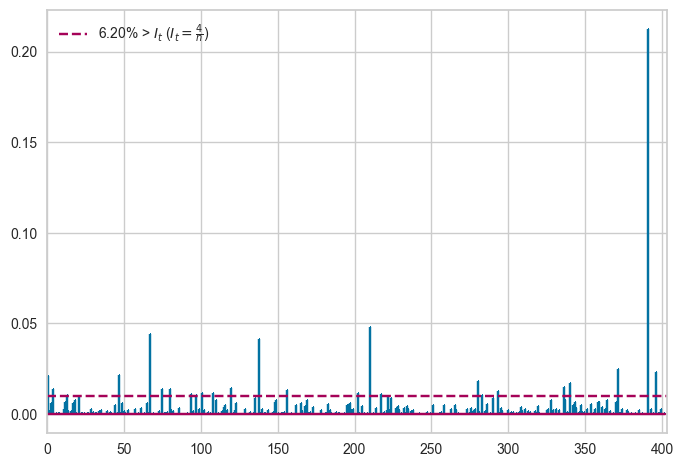

In [55]:
cookdist = CooksDistance().fit(samplel40[set_for_model3], samplel40['Friction_mean'])
plt.legend()

<AxesSubplot: xlabel='Friction_mean', ylabel='Count'>

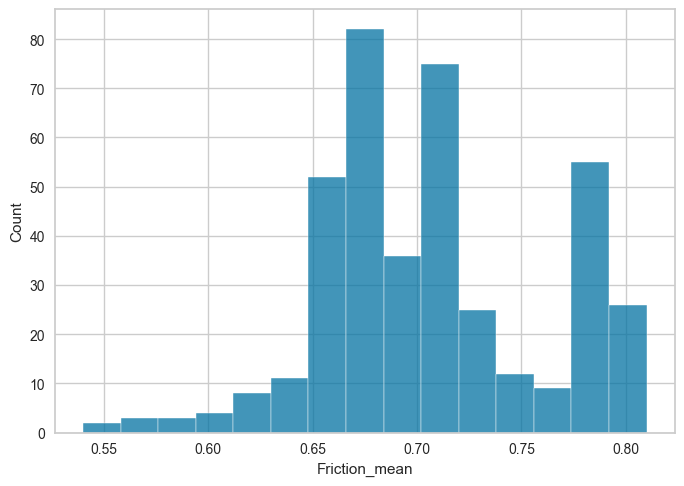

In [56]:
sns.histplot(x = samplel40['Friction_mean'])

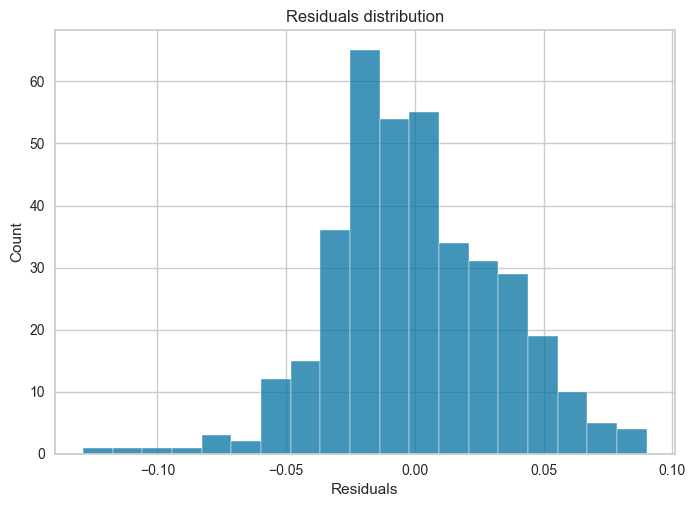

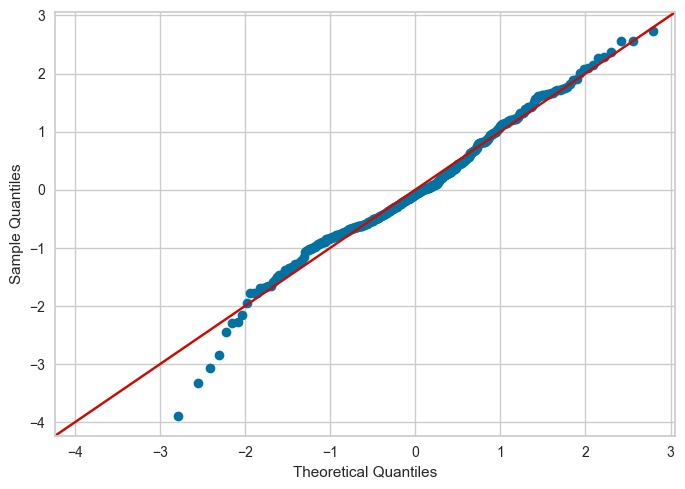

In [57]:
samplel41 = samplel40[cookdist.distance_ < 0.01]

res4 = linear_regression_report(data=samplel41, target='Friction_mean',
                                features=set_for_model3, model=LinearRegression())

In [58]:
res4['r2_score'], res4['r2adj_score'], res4['mse'], res4['shapiro']

(0.5693399722578516,
 0.56472163415874,
 0.0010906079227005472,
 ShapiroResult(statistic=0.985938549041748, pvalue=0.0009936890564858913))

In [59]:
X = sm.add_constant(samplel41[set_for_model3])
sm.OLS(samplel41['Friction_mean'], X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Friction_mean   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     123.3
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           6.25e-67
Time:                        21:11:09   Log-Likelihood:                 752.81
No. Observations:                 378   AIC:                            -1496.
Df Residuals:                     373   BIC:                            -1476.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7001      0.014     48.744      0.000       0.672       0.728
Tsurf_mean    -0.0051      0.000    -10.965      0.000      -0.006      -0.004
Water_mean    -0.0854      0.008    -10.136      0.000      -0.102      -0.069
cloudcover    -0.0001   7.01e-05     -2.017      0.044      -0.000   -3.57e-06
humidity       0.0004      0.000      1.826      0.069   -2.83e-05       0.001
==============================================================================
Omnibus:                        5.205   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                6.964
Skew:                          -0.051   Prob(JB):                       0.0308
Kurtosis:                       3.657   Cond. No.                         856.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
for coef, feature in zip(res4['model'].coef_, set_for_model3):
    print(feature, coef)

Tsurf_mean -0.005086045639036591
Water_mean -0.08538112455582018
cloudcover -0.0001413693992920824
humidity 0.00036699399998915607


Посмотрим на качество модели на тесте:

In [61]:
test = pd.read_csv('test.csv')
testl4 = test[test['State_'] < 4]

5      2.078067
8      2.707290
9      3.468057
10     2.085490
12     2.378164
         ...   
986    1.112569
987    1.046080
988    1.624777
994    2.242329
996    2.899781
Length: 422, dtype: float64

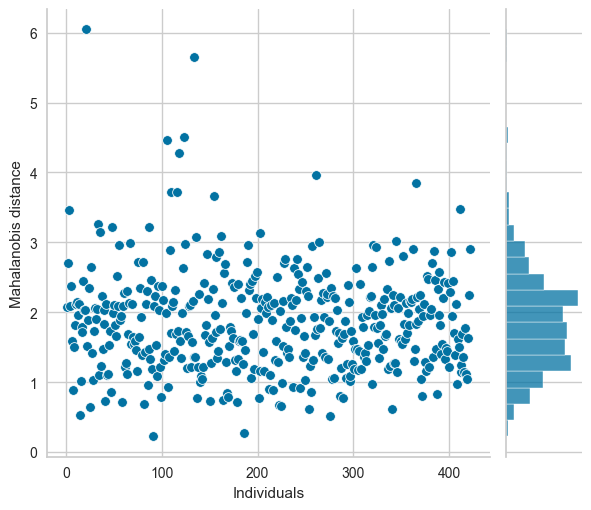

In [62]:
plot_mahalanobis(testl4, set_for_model3)

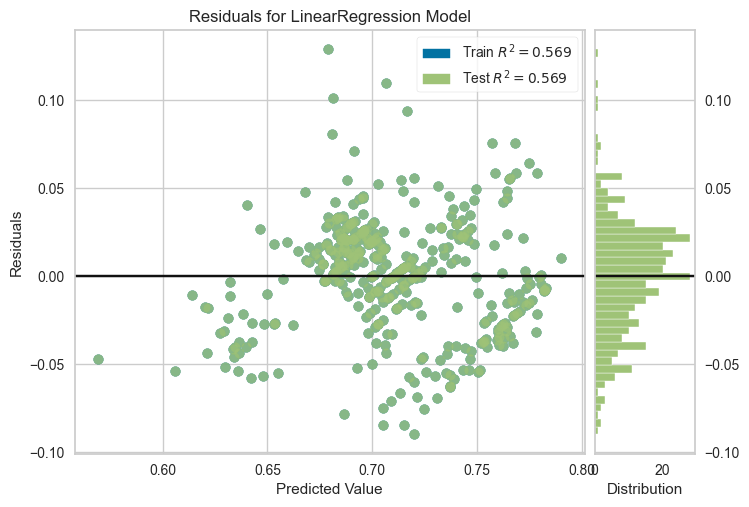

In [63]:
from yellowbrick.regressor import residuals_plot
visualizer = residuals_plot(LinearRegression(), X_train=samplel41[set_for_model3], y_train=samplel41['Friction_mean'])

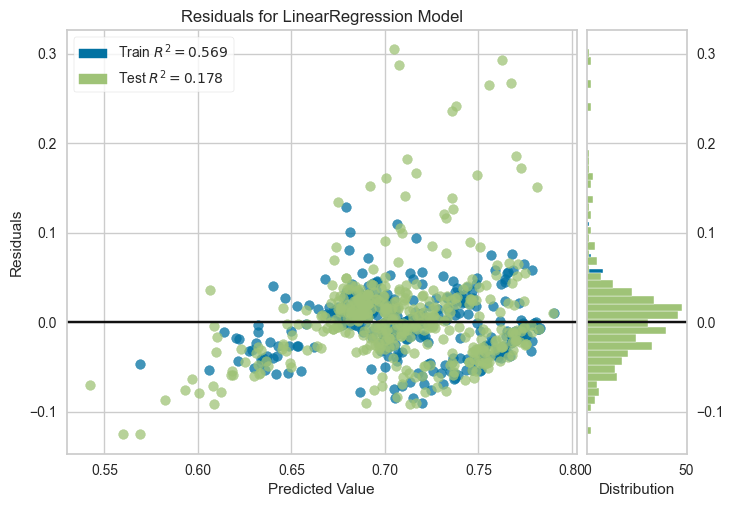

In [64]:
visualizer = residuals_plot(LinearRegression(), X_train=samplel41[set_for_model3], y_train=samplel41['Friction_mean'],
                            X_test=testl4[set_for_model3], y_test=testl4['Friction_mean'])

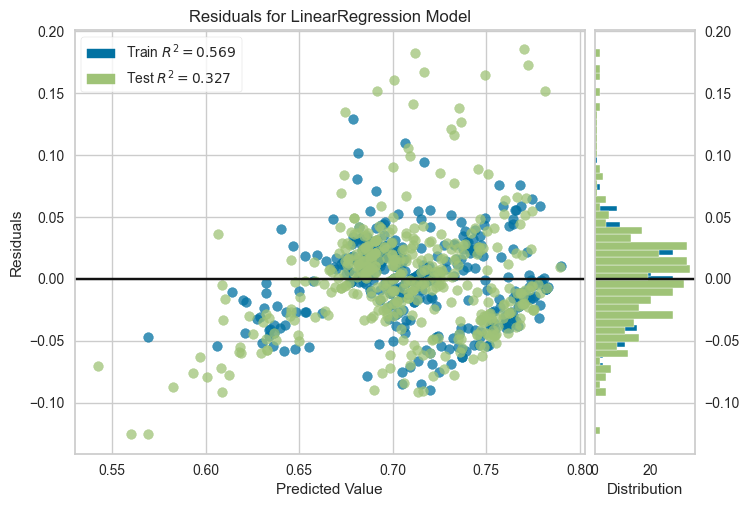

In [65]:
visualizer2 = residuals_plot(LinearRegression(), X_train=samplel41[set_for_model3], y_train=samplel41['Friction_mean'],
                            X_test=testl4[testl4['Friction_mean'] > 0.5][set_for_model3], y_test=testl4[testl4['Friction_mean'] > 0.5]['Friction_mean'])